## PROYECTO INDIVIDUAL 1

### MACHINE LEARNING OPERATIONS

##### JOAQUIN MILLAN LANHOZO

##### Lectura de archivos

In [299]:
# Importo las librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import missingno as msno
import ast
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
# Diccionario a modo informativo de sobre que significan las variables del dataset movies

diccionario_variables = pd.read_excel("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/PI_ML_OPS/Diccionario de Datos - Movies.xlsx")
diccionario_variables

Característica                                        Descripción
0                   adult  Indica si la película tiene califiación X, exc...
1   belongs_to_collection  Un diccionario que indica a que franquicia o s...
2                  budget          El presupuesto de la película, en dólares
3                  genres  Un diccionario que indica todos los géneros as...
4                homepage               La página web oficial de la película
5                      id                                  ID de la pelicula
6                 imdb_id                             IMDB ID de la pelicula
7       original_language     Idioma original en la que se grabo la pelicula
8          original_title                     Titulo original de la pelicula
9                overview                     Pequeño resumen de la película
10             popularity  Puntaje de popularidad de la película, asignad...
11            poster_path                      URL del póster de la película
12   production_companies  Lista con las compañias productoras asociadas ...
13   production_countries  Lista con los países donde se produjo la película
14           release_date                    Fecha de estreno de la película
15                revenue             Recaudación de la pelicula, en dolares
16                runtime                Duración de la película, en minutos
17       spoken_languages  Lista con los idiomas que se hablan en la peli...
18                 status  Estado de la pelicula actual (si fue anunciada...
19                tagline                Frase celebre asociadaa la pelicula
20                  title                              Titulo de la pelicula
21                  video  Indica si hay o no un trailer en video disponi...
22           vote_average         Puntaje promedio de reseñas de la pelicula
23             vote_count  Numeros de votos recibidos por la pelicula, en...

In [3]:
# Leo la informacion del dataset de movies y miro los primeros registros. Descripcion de las variables recien vistas.

movies = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/PI_ML_OPS/movies_dataset.csv")
movies.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\1960278825.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/PI_ML_OPS/movies_dataset.csv")


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [4]:
# Vista de ultimos 5 registros

movies.tail()

adult belongs_to_collection budget  \
45461  False                   NaN      0   
45462  False                   NaN      0   
45463  False                   NaN      0   
45464  False                   NaN      0   
45465  False                   NaN      0   

                                                  genres  \
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language       original_title  \
45461                fa              رگ خواب   
45462                tl  Siglo ng Pagluluwal   
45463                en             Betrayal   
45464                en  Satana likuyushchiy   
45465                en             Queerama   

                                                overview  ... release_date  \
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisation of homosexual...  ...   2017-06-09   

      revenue runtime                          spoken_languages    status  \
45461     0.0    90.0    [{'iso_639_1': 'fa', 'name': 'فارسی'}]  Released   
45462     0.0   360.0         [{'iso_639_1': 'tl', 'name': ''}]  Released   
45463     0.0    90.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
45464     0.0    87.0                                        []  Released   
45465     0.0    75.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                          tagline                title  video  \
45461  Rising and falling between a man and woman               Subdue  False   
45462                                         NaN  Century of Birthing  False   
45463                      A deadly game of wits.             Betrayal  False   
45464                                         NaN     Satan Triumphant  False   
45465                                         NaN             Queerama  False   

      vote_average vote_count  
45461          4.0        1.0  
45462          9.0        3.0  
45463          3.8        6.0  
45464          0.0        0.0  
45465          0.0        0.0  

[5 rows x 24 columns]

In [5]:
# Leo el otro dataset de credits. Son 3 columnas, pero con el id de pelicula, el cast y crew de las peliculas todo agrupado

credits = pd.read_csv("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/PI_ML_OPS/credits.csv")
credits

cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
45475                                                 []   

                                                    crew      id  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602  
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357  
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862  
...                                                  ...     ...  
45471  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050  
45472  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109  
45473  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758  
45474  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506  
45475  [{'credit_id': '593e676c92514105b702e68e', 'de...  461257  

[45476 rows x 3 columns]

#### Primer vistazo a los dataframes

In [6]:
# Miramos cuantas filas (registros) y columnas (features) tienen los dataframes

movies.shape

(45466, 24)

In [7]:
# Informacion respecto al tipo de dato y valores nulos

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
# Miro los nulos y su porcentaje de representacion sobre el total del dataset

nulos_movies = pd.DataFrame(movies.isnull().sum().sort_values(ascending = False))
nulos_movies["Porcentaje de nulos"] = round(nulos_movies/movies.shape[0]*100,2)
nulos_movies.rename(columns = {0:"Nro nulos"})

Nro nulos  Porcentaje de nulos
belongs_to_collection      40972                90.12
homepage                   37684                82.88
tagline                    25054                55.10
overview                     954                 2.10
poster_path                  386                 0.85
runtime                      263                 0.58
status                        87                 0.19
release_date                  87                 0.19
imdb_id                       17                 0.04
original_language             11                 0.02
spoken_languages               6                 0.01
title                          6                 0.01
video                          6                 0.01
vote_average                   6                 0.01
revenue                        6                 0.01
vote_count                     6                 0.01
popularity                     5                 0.01
production_companies           3                 0.01
production_countries           3                 0.01
original_title                 0                 0.00
id                             0                 0.00
genres                         0                 0.00
budget                         0                 0.00
adult                          0                 0.00

<Axes: >

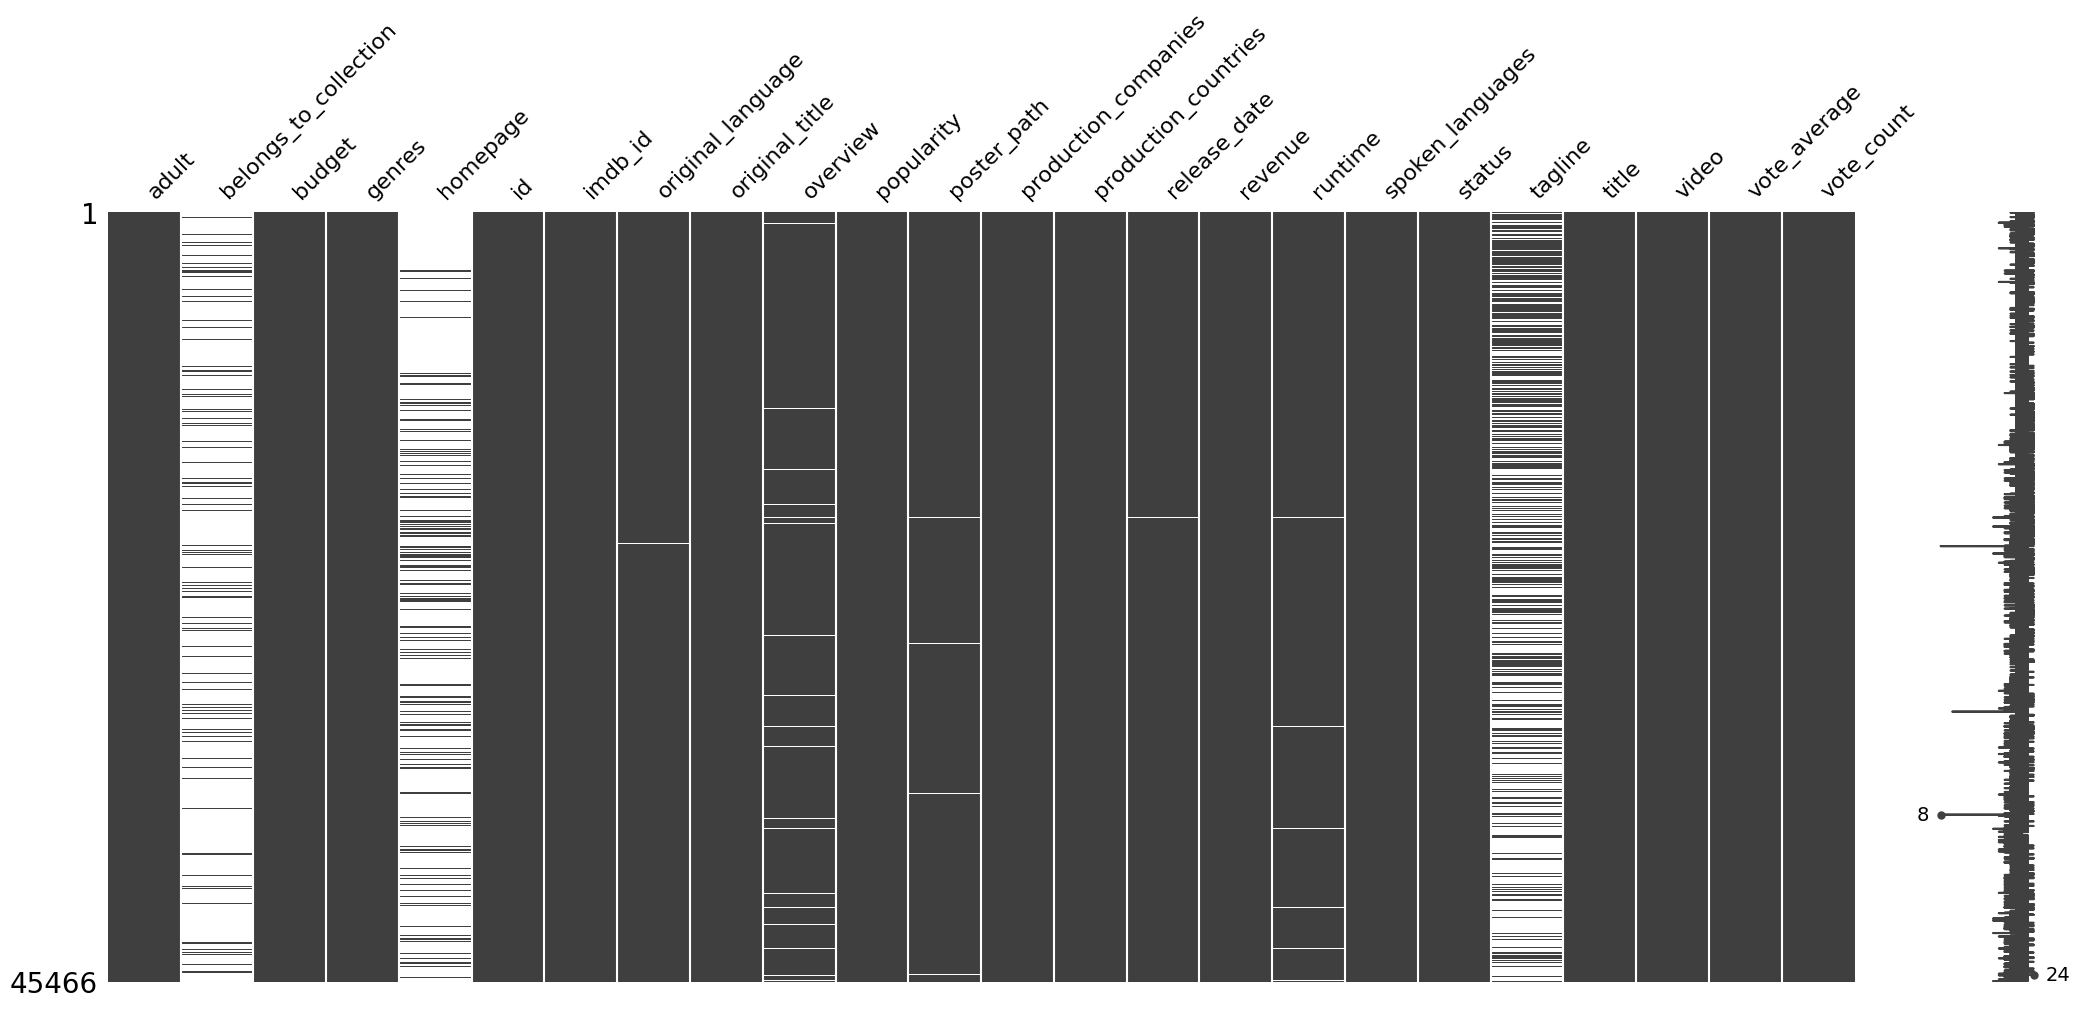

In [9]:
# Visualizacion para ver aun con mas profundidad los nulos

msno.matrix(movies)

In [10]:
# Miramos si hay datos duplicados

movies.duplicated().sum()

13

In [11]:
# Miramos los duplicados

duplicados_movies = movies[movies.duplicated()]

# El unico que realmente veo duplicado filtrando estas columnas es el id_index 13375 y 16764

duplicados_movies[["title", "id", "overview", "tagline","release_date", "runtime"]].sort_values(by="title")



title      id  \
13375                        Blackout  141971   
16764                        Blackout  141971   
23044                     Brotherhood   25541   
40040           Cemetery of Splendour  298721   
22151                Days of Darkness   18440   
24844                            Deal   11115   
29374                       King Lear   42495   
9165                      Le Samouraï    5511   
28860  Nana, the True Key of Pleasure  168538   
21854                    The Congress  152795   
1465                      The Promise  105045   
21165                     The Tempest  119916   
9327                      The Warrior   23305   

                                                overview  \
13375  Recovering from a nail gun shot to the head an...   
16764  Recovering from a nail gun shot to the head an...   
23044  Former Danish servicemen Lars and Jimmy are th...   
40040  In a hospital, ten soldiers are being treated ...   
22151  When a comet strikes Earth and kicks up a clou...   
24844  As an ex-gambler teaches a hot-shot college ki...   
29374  King Lear, old and tired, divides his kingdom ...   
9165   Hitman Jef Costello is a perfectionist who alw...   
28860  In Zola's Paris, an ingenue arrives at a tony ...   
21854  More than two decades after catapulting to sta...   
1465   East-Berlin, 1961, shortly after the erection ...   
21165  Prospero, the true Duke of Milan is now living...   
9327   In feudal India, a warrior (Khan) who renounce...   

                                                 tagline release_date  runtime  
13375  Which one is the first to return - memory or t...   2008-12-26    108.0  
16764  Which one is the first to return - memory or t...   2008-12-26    108.0  
23044                                                NaN   2009-10-21     90.0  
40040                                                NaN   2015-09-02    122.0  
22151                                                NaN   2007-01-01     89.0  
24844                                                NaN   2008-01-29     85.0  
29374                                                NaN   1971-02-04    137.0  
9165   There is no solitude greater than that of the ...   1967-10-25    105.0  
28860                                                NaN   1983-06-13     92.0  
21854                                                NaN   2013-05-16    122.0  
1465                             A love, a hope, a wall.   1995-02-16    115.0  
21165                                                NaN   1980-02-27    123.0  
9327                                                 NaN   2001-09-23     86.0

In [12]:
# Estos dos registros si que estan duplicados, eliminar

movies.loc[[16764,13375]]

adult belongs_to_collection budget  \
16764  False                   NaN      0   
13375  False                   NaN      0   

                                                  genres homepage      id  \
16764  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...      NaN  141971   
13375  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...      NaN  141971   

         imdb_id original_language original_title  \
16764  tt1180333                fi       Blackout   
13375  tt1180333                fi       Blackout   

                                                overview  ... release_date  \
16764  Recovering from a nail gun shot to the head an...  ...   2008-12-26   
13375  Recovering from a nail gun shot to the head an...  ...   2008-12-26   

      revenue runtime                        spoken_languages    status  \
16764     0.0   108.0  [{'iso_639_1': 'fi', 'name': 'suomi'}]  Released   
13375     0.0   108.0  [{'iso_639_1': 'fi', 'name': 'suomi'}]  Released   

                                                 tagline     title  video  \
16764  Which one is the first to return - memory or t...  Blackout  False   
13375  Which one is the first to return - memory or t...  Blackout  False   

      vote_average vote_count  
16764          6.7        3.0  
13375          6.7        3.0  

[2 rows x 24 columns]

In [13]:
# Al ver por curiosidad, si habia muchos titulos de pelicula repetidos. 

title_mov = movies["title"]
title_mov.duplicated().sum()
title_mov_dup = title_mov[title_mov.duplicated()]#= title_mov[title_mov != "Nan"]
title_mov_dup.isnull().sum()
title_mov_dup.sort_values().head(20)

#title_mov #  = movies["title"]!="NaN"]
#title_mov[title_mov.duplicated()].sort_values()

42690                      10 Minutes
15200                    12 Angry Men
32791                       12 Chairs
13003    20,000 Leagues Under the Sea
20848    20,000 Leagues Under the Sea
24109    20,000 Leagues Under the Sea
44956                            2:22
12042                    3:10 to Yuma
22527                        47 Ronin
41749                         7 Years
40542                               8
22988                               8
24524                               9
18991                   A Better Life
33671               A Better Tomorrow
22027               A Bucket of Blood
33961           A Chinese Ghost Story
14394               A Christmas Carol
8843                A Christmas Carol
22189               A Christmas Carol
Name: title, dtype: object

In [14]:
# Vemos algun ejemplo de los duplicados para entender. 
# Esta bien que haya duplicados en este caso, ya que seran reestrenos o tendran distintas caracecteristicas

movies[movies["title"]== "A Christmas Carol"]

adult belongs_to_collection     budget  \
1067   False                   NaN          0   
8843   False                   NaN          0   
14394  False                   NaN  200000000   
19212  False                   NaN          0   
22189  False                   NaN          0   
22207  False                   NaN          0   
22208  False                   NaN          0   

                                                  genres  \
1067   [{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...   
8843   [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
14394  [{'id': 16, 'name': 'Animation'}, {'id': 18, '...   
19212  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
22189  [{'id': 10751, 'name': 'Family'}, {'id': 18, '...   
22207                  [{'id': 16, 'name': 'Animation'}]   
22208  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   

                                                homepage     id    imdb_id  \
1067                                                 NaN  25842  tt0029992   
8843                                                 NaN  13189  tt0087056   
14394  http://disney.go.com/disneypictures/achristmas...  17979  tt1067106   
19212                                                NaN  16716  tt0216621   
22189                                                NaN  45697  tt0188504   
22207                                                NaN  47257  tt0112668   
22208                                                NaN  28769  tt0406649   

      original_language     original_title  \
1067                 en  A Christmas Carol   
8843                 en  A Christmas Carol   
14394                en  A Christmas Carol   
19212                en  A Christmas Carol   
22189                en  A Christmas Carol   
22207                en  A Christmas Carol   
22208                en  A Christmas Carol   

                                                overview  ... release_date  \
1067   Reginald Owen portrays Charles Dickens' holida...  ...   1938-12-16   
8843   An old bitter miser who makes excuses for his ...  ...   1984-12-17   
14394  Miser Ebenezer Scrooge is awakened on Christma...  ...   2009-11-04   
19212  Scrooge is a miserly old businessman in 1840's...  ...   1999-12-05   
22189  "If I could work my will, every idiot that goe...  ...   1977-12-24   
22207  One of the best-loved holiday stories of all t...  ...   1997-01-01   
22208  Miser Ebenezer Scrooge is awakened on Christma...  ...   2004-11-28   

           revenue runtime                                   spoken_languages  \
1067           0.0    69.0           [{'iso_639_1': 'en', 'name': 'English'}]   
8843           0.0   100.0           [{'iso_639_1': 'en', 'name': 'English'}]   
14394  325233863.0    96.0           [{'iso_639_1': 'en', 'name': 'English'}]   
19212          0.0    95.0           [{'iso_639_1': 'en', 'name': 'English'}]   
22189          0.0    58.0           [{'iso_639_1': 'en', 'name': 'English'}]   
22207          0.0    72.0  [{'iso_639_1': 'pl', 'name': 'Polski'}, {'iso_...   
22208          0.0    87.0           [{'iso_639_1': 'de', 'name': 'Deutsch'}]   

         status                                            tagline  \
1067   Released                 Greater than "David Copperfield" !   
8843   Released  A new powerful presentation of the most loved ...   
14394  Released                                 Season's Greedings   
19212  Released                                                NaN   
22189  Released                   Being a Ghost Story of Christmas   
22207  Released  One of the best-loved holiday stories of all t...   
22208  Released                                                NaN   

                   title  video vote_average vote_count  
1067   A Christmas Carol  False          7.0       34.0  
8843   A Christmas Carol  False          7.1       42.0  
14394  A Christmas Carol  False          6.6     1137.0  
19212  A Christmas Carol  False          6.3       42.0  
22189  A Chris

In [15]:
# Miro registros que tiene el dataframe credits

credits.shape

(45476, 3)

In [16]:
# No tiene valores nulos

credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [17]:
# Hay registros duplicados

duplicates_sum = credits.duplicated().sum()
print("Total duplicated entries:", duplicates_sum)

Total duplicated entries: 37


In [18]:
# Viendo los ids de peliculas, no veo realmente registros duplicados.
# La funcion en la pagina web dice que detecta duplicados, no tratarlos como duplicados al no tener certeza. 
# PandasDataFrame.duplicated(subset=None, keep='first')[source]
# Return boolean Series denoting duplicate rows. 

duplicates_credits = credits[credits.duplicated()]
duplicates_credits.sort_values(by = "id")

cast  \
25950  [{'cast_id': 12, 'character': 'The Creature', ...   
9165   [{'cast_id': 11, 'character': 'Jef Costello', ...   
25969  [{'cast_id': 11, 'character': 'Mike Gaucher / ...   
25967  [{'cast_id': 1, 'character': 'Churchill', 'cre...   
44831  [{'cast_id': 1, 'character': 'Ash Ketchum', 'c...   
24843  [{'cast_id': 13, 'character': 'Tommy Vinson', ...   
25957  [{'cast_id': 6, 'character': 'Mila', 'credit_i...   
44836  [{'cast_id': 1, 'character': 'Ash Ketchum (voi...   
15765  [{'cast_id': 4, 'character': '', 'credit_id': ...   
12066  [{'cast_id': 1000, 'character': 'Martha', 'cre...   
33755  [{'cast_id': 4, 'character': 'Zak Gibbs', 'cre...   
22150  [{'cast_id': 1, 'character': 'Lin', 'credit_id...   
15074  [{'cast_id': 1, 'character': 'Catherine Barkle...   
9327   [{'cast_id': 1, 'character': 'Lafcadia - Warri...   
25955  [{'cast_id': 1, 'character': 'Johan Falk', 'cr...   
25956  [{'cast_id': 1, 'character': 'Johan Falk', 'cr...   
23043  [{'cast_id': 1001, 'character': 'Tykke', 'cred...   
29387  [{'cast_id': 4, 'character': 'King Lear', 'cre...   
25974  [{'cast_id': 2, 'character': 'The Man', 'credi...   
20842  [{'cast_id': 2, 'character': 'Sultan Amar', 'c...   
21115  [{'cast_id': 3, 'character': 'Himself', 'credi...   
40287  [{'cast_id': 1001, 'character': 'Max.', 'credi...   
1465   [{'cast_id': 5, 'character': 'Sophie II', 'cre...   
20898  [{'cast_id': 1, 'character': 'Liz Hamilton', '...   
25949  [{'cast_id': 3, 'character': 'Sam Smith', 'cre...   
21164                                                 []   
25968  [{'cast_id': 6, 'character': 'Ray', 'credit_id...   
25953  [{'cast_id': 1, 'character': 'Orry Main', 'cre...   
16764  [{'cast_id': 1, 'character': 'Pekka', 'credit_...   
13375  [{'cast_id': 1, 'character': 'Pekka', 'credit_...   
25965                                                 []   
21853  [{'cast_id': 5, 'character': 'Robin Wright', '...   
25966                                                 []   
28873  [{'cast_id': 3, 'character': 'Nana', 'credit_i...   
25975                                                 []   
25954  [{'cast_id': 7, 'character': 'Hollander', 'cre...   
45275  [{'cast_id': 2, 'character': 'Ebba', 'credit_i...   

                                                    crew      id  
25950  [{'credit_id': '52fe4380c3a36847f80590dd', 'de...    3057  
9165   [{'credit_id': '52fe440ac3a36847f807ee01', 'de...    5511  
25969  [{'credit_id': '52fe44b8c3a36847f80a6389', 'de...    8767  
25967  [{'credit_id': '52fe4527c3a36847f80bf5e5', 'de...    9755  
44831  [{'credit_id': '52fe43de9251416c750213ff', 'de...   10991  
24843  [{'credit_id': '52fe43fb9251416c75024ff5', 'de...   11115  
25957  [{'credit_id': '52fe44809251416c75037035', 'de...   11752  
44836  [{'credit_id': '52fe45049251416c75048e35', 'de...   12600  
15765  [{'credit_id': '52fe454f9251416c75052209', 'de...   13209  
12066  [{'credit_id': '52fe46199251416c7506d0ff', 'de...   14788  
33755  [{'credit_id': '54afed0cc3a3683fba00443d', 'de...   15028  
22150  [{'credit_id': '52fe477c9251416c7509b27d', 'de...   18440  
15074  [{'credit_id': '56d73d3e9251414291002436', 'de...   22649  
9327   [{'credit_id': '52fe4465c3a368484e02091d', 'de...   23305  
25955  [{'credit_id': '52fe447dc3a368484e026053', 'de...   24023  
25956  [{'credit_id': '52fe447dc3a368484e0260fd', 'de...   24026  
23043  [{'credit_id': '52fe44cec3a368484e037efd', 'de...   25541  
29387  [{'credit_id': '52fe4606c3a36847f80e7e77', 'de...   42495  
25974  [{'credit_id': '52fe4655c3a36847f80f96bf', 'de...   43629  
20842  [{'credit_id': '52fe4962c3a368484e1289fd', 'de...   77221  
21115  [{'credit_id': '52fe48e09251416c9109b347', 'de...   84198  
40287  [{'credit_id': '55140dfa92514103e9002d99', 'de...   97995  
1465   [{'credit_id': '52fe4a44c3a36847f81c463f', 'de...  105045  
20898  [{'credit_id': '52fe4ac8c3a36847f81e1445', 'de...  109962  
25949  [{'credit_id': '52fe4b9bc3a36847f820bba1', 'de...  116723  
21164  [{'credit_id': '52fe4c

### Transformaciones

#### Desanidando columnas

In [19]:
# Columnas que tienen datos anidados dentro del mismo registro

movies[["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]].info()
movies[["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]].head()
#belongs_to_collection|genres|production_companies|production_countries|spoken_languages.
# Las 5 columnas son de tipo Object
# Solo belongs_to_collection es de tipo diccionario, resto son listas con diccionarios adentro.
# Sin contemplar los valores que son anomalias



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   belongs_to_collection  4494 non-null   object
 1   genres                 45466 non-null  object
 2   production_companies   45463 non-null  object
 3   production_countries   45463 non-null  object
 4   spoken_languages       45460 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


belongs_to_collection  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...   
1                                                NaN   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...   
3                                                NaN   
4  {'id': 96871, 'name': 'Father of the Bride Col...   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   

                                    spoken_languages  
0           [{'iso_639_1': 'en', 'name': 'English'}]  
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  
2           [{'iso_639_1': 'en', 'name': 'English'}]  
3           [{'iso_639_1': 'en', 'name': 'English'}]  
4           [{'iso_639_1': 'en', 'name': 'English'}]

##### BELONGS TO COLLECTION

In [20]:
#belongs_to_collection

# ast_literal_eval() Funcion para convertir strings que representan diccionarios a diccionarios
#se utiliza para evaluar expresiones literales de Python de manera segura. Su propósito principal es evaluar 
#cadenas que representan estructuras de datos simples y seguras, como diccionarios, listas, tuplas y valores escalares.

def convert_to_dict(val):
    try:
        return ast.literal_eval(val)
    except (SyntaxError, ValueError):
        return None

# Apply the function to convert the strings to dictionary values
movies["belongs_to_collection"] = movies["belongs_to_collection"].apply(convert_to_dict)

In [21]:
# Convierto la columna a dataframe con pandas para poder aplicar transformaciones

df_collection = movies.belongs_to_collection
type(df_collection)
df_collection = pd.DataFrame(df_collection)
type(df_collection)
df_collection.head(1)

belongs_to_collection
0  {'id': 10194, 'name': 'Toy Story Collection', ...

In [22]:
# Itero por fila para extraer los ids de cada par clave, valor

for index, row in df_collection.iterrows():
    if isinstance(row["belongs_to_collection"], dict):
        for key, value in row["belongs_to_collection"].items():
            df_collection.at[index, key] = value

In [23]:
# Verifico como quedo

df_collection.head(1)

belongs_to_collection       id  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  10194.0   

                   name                       poster_path  \
0  Toy Story Collection  /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg   

                      backdrop_path  
0  /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg

In [24]:
# Dropeo de columna original

df_collection = df_collection.drop("belongs_to_collection", axis=1)
df_collection.head(1)

id                  name                       poster_path  \
0  10194.0  Toy Story Collection  /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg   

                      backdrop_path  
0  /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg

In [25]:
# Check y cambio nombre de las columnas para juntar las columnas al dataframe

df_collection.head(2)
df_collection = df_collection.rename(columns={"id":"id_belongs_to_collection", "name" : "name_belongs_to_collection", "poster_path" : "poster_path_belongs_to_collection","backdrop_path" : "backdrop_path_belongs_to_collection"} )
df_collection.head(1)

id_belongs_to_collection name_belongs_to_collection  \
0                   10194.0       Toy Story Collection   

  poster_path_belongs_to_collection backdrop_path_belongs_to_collection  
0  /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg    /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg

In [26]:
# Junto la transformacion de la columna belongs_to_collection al df original

print("Antes del merge, teniamos: ", movies.shape[1], " columnas")
movies = pd.concat([movies, df_collection], axis=1)
print("Ahora tiene, ", movies.shape[1], "columnas")


Antes del merge, teniamos:  24  columnas
Ahora tiene,  28 columnas


##### GENRES

In [27]:
# genres
# 3 peliculas con 8 generos
# Ver hasta cuantos generos puede tener una pelicula
 
movies.genres.apply(lambda x: x.count("'id':")).max()

8

In [28]:
# Sabemos que es una lista con diccionario adentro

movies.genres.head(2)

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
Name: genres, dtype: object

In [29]:
# Aplico lambda para sacarle el texto de lista

movies["genres"] = movies.genres.apply(lambda x: x.replace("[",""))
movies["genres"] = movies.genres.apply(lambda x: x.replace("]",""))
movies.genres.head(2)


0    {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...
1    {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...
Name: genres, dtype: object

In [30]:
# Creo df para aplicarle las transformaciones

df_genres = pd.DataFrame(movies["genres"])

# La función ast.literal_eval() se utiliza para evaluar expresiones literales y literales de estructuras de datos en una forma segura.
def parse_string_to_list(row):
    try:
        return ast.literal_eval("[" + row + "]")
    except (ValueError, SyntaxError):
        return []

# Funcion para extraer los valores de cada fila
def extract_values(row, key):
    try:
        return [d[key] for d in row]
    except (TypeError, KeyError):
        return []


df_genres['parsed_list'] = movies["genres"].apply(parse_string_to_list)

# Creo nuevas columnas con los datos de cada columna y los paso a una lista
df_genres['ids'] = df_genres['parsed_list'].apply(extract_values, key='id')
df_genres['names'] = df_genres['parsed_list'].apply(extract_values, key='name')

# Drop de columna inutil
df_genres.drop(columns=['parsed_list'], inplace=True)



In [31]:
# Renombro columnas para que quede mas claro el origen de su columna, previo a unirlo al dataframe.

df_genres = df_genres.rename(columns={"ids":"ids_genre", "names" : "genres_names"} )

df_genres

genres        ids_genre  \
0      {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...  [16, 35, 10751]   
1      {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...  [12, 14, 10751]   
2      {'id': 10749, 'name': 'Romance'}, {'id': 35, '...      [10749, 35]   
3      {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...  [35, 18, 10749]   
4                           {'id': 35, 'name': 'Comedy'}             [35]   
...                                                  ...              ...   
45461  {'id': 18, 'name': 'Drama'}, {'id': 10751, 'na...      [18, 10751]   
45462                        {'id': 18, 'name': 'Drama'}             [18]   
45463  {'id': 28, 'name': 'Action'}, {'id': 18, 'name...     [28, 18, 53]   
45464                                                                  []   
45465                                                                  []   

                       genres_names  
0       [Animation, Comedy, Family]  
1      [Adventure, Fantasy, Family]  
2                 [Romance, Comedy]  
3          [Comedy, Drama, Romance]  
4                          [Comedy]  
...                             ...  
45461               [Drama, Family]  
45462                       [Drama]  
45463     [Action, Drama, Thriller]  
45464                            []  
45465                            []  

[45466 rows x 3 columns]

In [32]:
# Junto el dataframe de generos al original

movies = pd.concat([movies, df_genres], axis=1)
movies[["ids_genre","genres_names"]]


ids_genre                  genres_names
0      [16, 35, 10751]   [Animation, Comedy, Family]
1      [12, 14, 10751]  [Adventure, Fantasy, Family]
2          [10749, 35]             [Romance, Comedy]
3      [35, 18, 10749]      [Comedy, Drama, Romance]
4                 [35]                      [Comedy]
...                ...                           ...
45461      [18, 10751]               [Drama, Family]
45462             [18]                       [Drama]
45463     [28, 18, 53]     [Action, Drama, Thriller]
45464               []                            []
45465               []                            []

[45466 rows x 2 columns]

In [33]:
# La funcion explode sirva para desarmar una lista e ir generando filas repitiendo las demas columnas pero una fila por cada valor de la lista

df_genres.head()
df_exploded_id = df_genres["ids_genre"].explode('ids_genre')
df_exploded_id.head()


0       16
1       35
2    10751
3       12
4       14
Name: ids_genre, dtype: object

In [34]:
# Expando ambas para luego juntarlas y al sacar duplicados obtengo un listado completo de los generos

df_exploded_name = df_genres["genres_names"].explode('genres_names')
df_exploded_name.head()

0    Animation
1       Comedy
2       Family
3    Adventure
4      Fantasy
Name: genres_names, dtype: object

In [35]:
# Concateno para hacerle un value_counts y estar informado de los generos que aparecen

df_exploded_concat = pd.concat([df_exploded_id, df_exploded_name], axis=1)
df_exploded_concat.value_counts()

ids_genre  genres_names                         
18         Drama                                    20265
35         Comedy                                   13182
53         Thriller                                  7624
10749      Romance                                   6735
28         Action                                    6596
27         Horror                                    4673
80         Crime                                     4307
99         Documentary                               3932
12         Adventure                                 3496
878        Science Fiction                           3049
10751      Family                                    2770
9648       Mystery                                   2467
14         Fantasy                                   2313
16         Animation                                 1935
10769      Foreign                                   1622
10402      Music                                     1598
36         History     

In [36]:
# Listado entero de generos 

df_exploded_concat = df_exploded_concat.drop_duplicates()
df_exploded_concat

ids_genre                           genres_names
0            16                              Animation
1            35                                 Comedy
2         10751                                 Family
3            12                              Adventure
4            14                                Fantasy
6         10749                                Romance
9            18                                  Drama
12           28                                 Action
13           80                                  Crime
15           53                               Thriller
32           27                                 Horror
36           36                                History
63          878                        Science Fiction
82         9648                                Mystery
105       10752                                    War
138       10769                                Foreign
144         NaN                                    NaN
159       10402                                  Music
191          99                            Documentary
490          37                                Western
742       10770                               TV Movie
45037     11176                   Carousel Productions
45038     11602              Vision View Entertainment
45039     29812       Telescene Film Group Productions
63910      2883                                Aniplex
63911      7759                                GoHands
63912      7760                              BROSTA TV
63913      7761  Mardock Scramble Production Committee
63914     33751                       Sentai Filmworks
75565     17161                          Odyssey Media
75566     18012                     Pulser Productions
75567     18013                            Rogue State
75568     23822                             The Cartel

##### PRODUCTION COMPANIES

In [37]:
# Production companies

movies.production_companies


0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
45461                                                   []
45462               [{'name': 'Sine Olivia', 'id': 19653}]
45463    [{'name': 'American World Pictures', 'id': 6165}]
45464                 [{'name': 'Yermoliev', 'id': 88753}]
45465                                                   []
Name: production_companies, Length: 45466, dtype: object

In [38]:
# Aplico lambda para sacarle el texto de lista

movies["production_companies"] = movies["production_companies"].fillna("")
movies["production_companies"] = movies.production_companies.apply(lambda x: x.replace("[",""))
movies["production_companies"] = movies.production_companies.apply(lambda x: x.replace("]",""))
movies.production_companies.head(2)

0         {'name': 'Pixar Animation Studios', 'id': 3}
1    {'name': 'TriStar Pictures', 'id': 559}, {'nam...
Name: production_companies, dtype: object

In [39]:
# Aplico mismas funciones que en el caso anterior

df_prod = pd.DataFrame(movies["production_companies"])


df_prod['parsed_list'] = movies["production_companies"].apply(parse_string_to_list)

df_prod['ids'] = df_prod['parsed_list'].apply(extract_values, key='id')
df_prod['names'] = df_prod['parsed_list'].apply(extract_values, key='name')

df_prod.drop(columns=['parsed_list'], inplace=True)


In [40]:
# Aclaro el origen de estas columnas

df_prod = df_prod.rename(columns= {"ids":"ids_production_companies", "names": "names_production_companies"})
df_prod

production_companies  \
0           {'name': 'Pixar Animation Studios', 'id': 3}   
1      {'name': 'TriStar Pictures', 'id': 559}, {'nam...   
2      {'name': 'Warner Bros.', 'id': 6194}, {'name':...   
3      {'name': 'Twentieth Century Fox Film Corporati...   
4      {'name': 'Sandollar Productions', 'id': 5842},...   
...                                                  ...   
45461                                                      
45462               {'name': 'Sine Olivia', 'id': 19653}   
45463    {'name': 'American World Pictures', 'id': 6165}   
45464                 {'name': 'Yermoliev', 'id': 88753}   
45465                                                      

      ids_production_companies  \
0                          [3]   
1           [559, 2550, 10201]   
2                [6194, 19464]   
3                        [306]   
4                 [5842, 9195]   
...                        ...   
45461                       []   
45462                  [19653]   
45463                   [6165]   
45464                  [88753]   
45465                       []   

                              names_production_companies  
0                              [Pixar Animation Studios]  
1      [TriStar Pictures, Teitler Film, Interscope Co...  
2                         [Warner Bros., Lancaster Gate]  
3               [Twentieth Century Fox Film Corporation]  
4           [Sandollar Productions, Touchstone Pictures]  
...                                                  ...  
45461                                                 []  
45462                                      [Sine Olivia]  
45463                          [American World Pictures]  
45464                                        [Yermoliev]  
45465                                                 []  

[45466 rows x 3 columns]

In [41]:
# Concateno el dataframe desanidado al df original

movies = pd.concat([movies, df_prod], axis=1)

In [42]:
# Aplico explode para poder ver informacion de las productoras. Primero por id y luego por nombre, 
# para poder juntarlas luego y obtener un listado de valores unicos 

df_prod_exploded_id = df_prod["ids_production_companies"].explode('ids_production_companies')


In [43]:
df_prod_exploded_name = df_prod["names_production_companies"].explode('names_production_companies')

In [44]:
df_prod_exploded_concat = pd.concat([df_prod_exploded_id, df_prod_exploded_name], axis=1)

In [45]:
df_prod_exploded_concat = df_prod_exploded_concat.drop_duplicates()

In [46]:
df_prod_exploded_concat

# vemos que hay muchas productoras de peliculas

ids_production_companies   names_production_companies
0                            3      Pixar Animation Studios
1                          559             TriStar Pictures
2                         2550                 Teitler Film
3                        10201    Interscope Communications
4                         6194                 Warner Bros.
...                        ...                          ...
82410                    85400             He and She Films
82414                    27570  Neptune Salad Entertainment
82415                    27571            Pirie Productions
82422                    19653                  Sine Olivia
82424                    88753                    Yermoliev

[23693 rows x 2 columns]

##### SPOKEN LANGUAGES

In [47]:
# Spoken language

movies.spoken_languages.head(2)

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
Name: spoken_languages, dtype: object

In [48]:
# Mismos procesos que las columnas desanidadas anteriormente

movies["spoken_languages"] = movies["spoken_languages"].fillna("")
movies["spoken_languages"] = movies.spoken_languages.apply(lambda x: x.replace("[",""))
movies["spoken_languages"] = movies.spoken_languages.apply(lambda x: x.replace("]",""))
movies.spoken_languages.head(2)

0               {'iso_639_1': 'en', 'name': 'English'}
1    {'iso_639_1': 'en', 'name': 'English'}, {'iso_...
Name: spoken_languages, dtype: object

In [49]:
df_language = pd.DataFrame(movies["spoken_languages"])

df_language['parsed_list'] = df_language["spoken_languages"].apply(parse_string_to_list)

df_language['iso_639_1'] = df_language['parsed_list'].apply(extract_values, key='iso_639_1')
df_language['names'] = df_language['parsed_list'].apply(extract_values, key='name')

df_language.drop(columns=['parsed_list'], inplace=True)

In [50]:
df_language_exploded_id = df_language["iso_639_1"].explode('iso_639_1')
df_language_exploded_name = df_language["names"].explode('names')
df_language_exploded_concat = pd.concat([df_language_exploded_id, df_language_exploded_name], axis=1)
df_language_exploded_concat = df_language_exploded_concat.drop_duplicates()
df_language_exploded_concat

# Listado de spoken languages

iso_639_1     names
0            en   English
2            fr  Français
7            es   Español
11           de   Deutsch
14           ru   Pусский
...         ...       ...
50360        sn          
52199        bi          
53740        ha     Hausa
53741        ig          
56772        mh          

[134 rows x 2 columns]

##### PRODUCTION COMPANIES

In [51]:
# Production countries

movies.production_countries.tail(3)

45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, dtype: object

In [52]:
# Mismos procedimientos que las columnas anteriores

movies["production_countries"] = movies["production_countries"].fillna("")
movies["production_countries"] = movies.production_countries.apply(lambda x: x.replace("[",""))
movies["production_countries"] = movies.production_countries.apply(lambda x: x.replace("]",""))
movies.production_countries.head(2)

0    {'iso_3166_1': 'US', 'name': 'United States of...
1    {'iso_3166_1': 'US', 'name': 'United States of...
Name: production_countries, dtype: object

In [53]:
df_countries = pd.DataFrame(movies["production_countries"])

df_countries['parsed_list'] = df_countries["production_countries"].apply(parse_string_to_list)

df_countries['iso_3166_1'] = df_countries['parsed_list'].apply(extract_values, key='iso_3166_1')
df_countries['production_countries_names'] = df_countries['parsed_list'].apply(extract_values, key='name')

df_countries.drop(columns=['parsed_list'], inplace=True)

In [54]:
df_countries#.rename( columns= {"names" : "production_countries_names"})

production_countries iso_3166_1  \
0      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
1      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
2      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
3      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
4      {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
...                                                  ...        ...   
45461               {'iso_3166_1': 'IR', 'name': 'Iran'}       [IR]   
45462        {'iso_3166_1': 'PH', 'name': 'Philippines'}       [PH]   
45463  {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
45464             {'iso_3166_1': 'RU', 'name': 'Russia'}       [RU]   
45465     {'iso_3166_1': 'GB', 'name': 'United Kingdom'}       [GB]   

       production_countries_names  
0      [United States of America]  
1      [United States of America]  
2      [United States of America]  
3      [United States of America]  
4      [United States of America]  
...                           ...  
45461                      [Iran]  
45462               [Philippines]  
45463  [United States of America]  
45464                    [Russia]  
45465            [United Kingdom]  

[45466 rows x 3 columns]

In [55]:
df_countries_exploded_id = df_countries["iso_3166_1"].explode('iso_3166_1')
df_countries_exploded_name = df_countries["production_countries_names"].explode('production_countries_names')
df_countries_exploded_concat = pd.concat([df_countries_exploded_id, df_countries_exploded_name], axis=1)
df_countries_exploded_concat = df_countries_exploded_concat.drop_duplicates()
df_countries_exploded_concat

# Listado de los paises productores de peliculas

iso_3166_1 production_countries_names
0             US   United States of America
6             DE                    Germany
10            GB             United Kingdom
13            FR                     France
19            IT                      Italy
...          ...                        ...
44279         AQ                 Antarctica
45600         GI                  Gibraltar
46943         BN          Brunei Darussalam
49816         HN                   Honduras
51402         GN                     Guinea

[162 rows x 2 columns]

In [56]:
# Lo junto con el dataframe original

movies = pd.concat([movies, df_countries], axis=1)

In [57]:
# Check de que se haya realizado correctamente

movies.head(2)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                               None  65000000   

                                              genres  \
0  {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...   
1  {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...   

                               homepage    id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story   862  tt0114709                en   
1                                   NaN  8844  tt0113497                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1        Jumanji  When siblings Judy and Peter discover an encha...  ...   

  backdrop_path_belongs_to_collection  \
0    /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg   
1                                 NaN   

                                              genres        ids_genre  \
0  {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...  [16, 35, 10751]   
1  {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...  [12, 14, 10751]   

                   genres_names  \
0   [Animation, Comedy, Family]   
1  [Adventure, Fantasy, Family]   

                                production_companies  \
0       {'name': 'Pixar Animation Studios', 'id': 3}   
1  {'name': 'TriStar Pictures', 'id': 559}, {'nam...   

   ids_production_companies  \
0                       [3]   
1        [559, 2550, 10201]   

                          names_production_companies  \
0                          [Pixar Animation Studios]   
1  [TriStar Pictures, Teitler Film, Interscope Co...   

                                production_countries iso_3166_1  \
0  {'iso_3166_1': 'US', 'name': 'United States of...       [US]   
1  {'iso_3166_1': 'US', 'name': 'United States of...       [US]   

   production_countries_names  
0  [United States of America]  
1  [United States of America]  

[2 rows x 37 columns]

#### OTRAS TRANSFORMACIONES

In [58]:
## Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

print("El numero de nulos en la columna revenue son de: ",movies.revenue.isnull().sum())
movies["revenue"] = movies.revenue.fillna(0)

El numero de nulos en la columna revenue son de:  6


In [59]:
# Check

movies.revenue.isnull().sum()

0

<Axes: xlabel='revenue', ylabel='Count'>

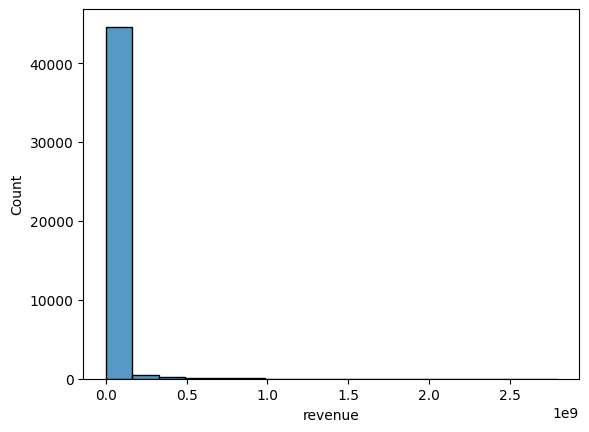

In [60]:
# Vista de la columna y su distribucion

sns.histplot(movies["revenue"])

In [61]:
movies.revenue.value_counts()[0]#.sort_values(ascending= False)

# Muchisimos valores en 0

38058

In [62]:
movies.revenue.value_counts()[0]/movies.shape[0]

# Muchisimos valores con revenue 0. Gran mayoria de 0 en este feature

0.8370650596049796

In [63]:
# Relleno de valores nulos para la columna budget

print("El numero de nulos en la columna budget son de: ", movies.budget.isnull().sum())
movies["revenue"] = movies.revenue.fillna(0)

El numero de nulos en la columna budget son de:  0


In [64]:
# Check

movies.budget.isnull().sum()

0

In [65]:
# Nulos en release_date

print("El numero de nulos en la columna release_date son de: ", movies.release_date.isnull().sum())

El numero de nulos en la columna release_date son de:  87


In [66]:
# Los valores nulos del campo release date deben eliminarse.

print(" Registros, previo a eliminar:", movies.shape[0])
movies = movies.dropna(subset= "release_date")
print(" Registros, posterior a eliminar:", movies.shape[0])

 Registros, previo a eliminar: 45466
 Registros, posterior a eliminar: 45379


In [67]:
#De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde 
#extraerán el año de la fecha de estreno.

movies.release_date

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45460    1991-05-13
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45379, dtype: object

In [68]:
# Conversion al formato deseado

movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d', errors='coerce')

# Extraigo el año de la fecha
movies["release_year"] = movies['release_date'].dt.year

In [69]:
# Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, 
#dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

movies[["budget", "revenue"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   45379 non-null  object 
 1   revenue  45379 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


In [70]:
# Cambio el tipo de dato, para poder correr el calculo

movies["budget"] = pd.to_numeric(movies["budget"], errors='coerce')

In [71]:
# Creacion del retorno, al tener la ganancia y el presupuesto.

movies["return"] = movies["revenue"]/ movies["budget"]

In [72]:
# Relleno de nulos por 0 y de valores infimos por nulos

movies["return"] = movies["return"].replace([np.inf, -np.inf], np.nan)
movies["return"] = movies["return"].fillna(0)

<Axes: xlabel='return', ylabel='Count'>

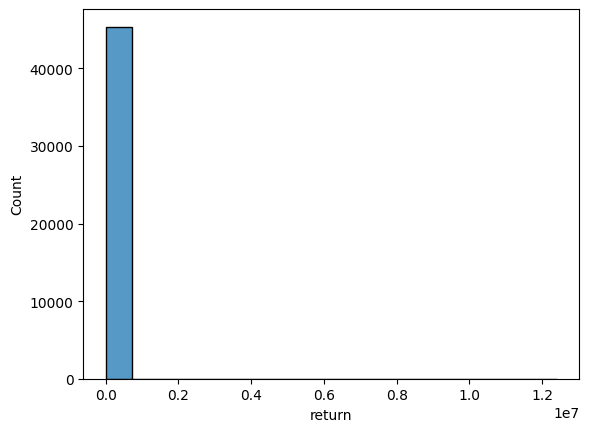

In [73]:
# Distribucion de la nueva columna. Muchos 0 logicamente

sns.histplot(movies["return"])

In [74]:
# Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.

print("Previo a la eliminacion de columnas, habia: ", movies.shape[1], " columnas")
movies.drop(columns=["video", "imdb_id", "adult", "original_title", "poster_path_belongs_to_collection","homepage", "poster_path"], inplace=True)
print("Despues de eliminar estas 7 columnas, hay: ", movies.shape[1], " Columnas")

Previo a la eliminacion de columnas, habia:  39  columnas
Despues de eliminar estas 7 columnas, hay:  32  Columnas


#### CREDITS

In [75]:
# Para poder verificar el gran volumen de datos que tiene este dataset usar...
# Muestra todas las columnas
#pd.set_option('display.max_columns', None)
#Muestra todo el parametro de las columnas
#pd.set_option('display.max_colwidth', None)

In [76]:
credits.head(2)

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   

                                                crew    id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  8844

In [77]:
# Le cambio el nombre de la columna del id(pelicula) a id_original
credits.rename(columns={'id':'id_original'}, inplace= True)

In [78]:
# Utilizo ast literal para evaluar y transformar las cadenas de texto que representan diccionarios a diccionarios propiamente dichos

credits['crew'] = credits['crew'].apply(ast.literal_eval) 
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew  id_original  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...          862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...         8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...        15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...        31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...        11862

In [79]:
# Creo df y aplico funcion para extraer la informacion de la columna

df_exploded = credits.explode('crew')

def extract_crew_info(x):
    if isinstance(x, dict):
        return pd.Series([x.get('credit_id', ''), x.get('department', ''),x.get('gender', ''),x.get('id', ''),x.get('job', ''),x.get('name', ''),x.get('profile_path', '')  ])
    else:
        return pd.Series(['', ''])

df_exploded[['credit_id', 'department', 'gender','id_crew','job', 'name', 'profile_path']] = df_exploded['crew'].apply(extract_crew_info) 


In [80]:
# Creacion de df

df_credits = credits.join(df_exploded[['credit_id', 'department', 'gender', 'id_crew', 'job', 'name', 'profile_path']]) 

In [81]:
# Elimino columnas que no son consideradas necesarias

df_credits.drop(columns=['crew','cast', 'credit_id','profile_path', 'gender'], inplace=True) 

In [82]:
# Vista de los primeros registros de la columna desanidada con su profunidad a filas por el explode

df_credits.head()

id_original department  id_crew         job            name
0          862  Directing   7879.0    Director   John Lasseter
0          862    Writing  12891.0  Screenplay     Joss Whedon
0          862    Writing      7.0  Screenplay  Andrew Stanton
0          862    Writing  12892.0  Screenplay      Joel Cohen
0          862    Writing  12893.0  Screenplay    Alec Sokolow

In [83]:
# Convertir las columnas numéricas a cadenas

df_credits['id_crew'] = df_credits['id_crew'].astype(str)
#df['gender'] = df['gender'].astype(str) la borre
df_credits['id_original'] = df_credits['id_original'].astype(str) 

In [84]:
# Conteo de los directores. Se ve que algunas peliculas cuentas con mas de 1 director.

director_resultado = df_credits[df_credits['job'] == 'Director']['job'].value_counts()
director_resultado 

Director    49048
Name: job, dtype: int64

In [85]:
# Filtro para ver solo los directores, que es el dato que requiero

df_director= df_credits[df_credits['job']== 'Director']
df_director.head()

id_original department  id_crew       job             name
0         862  Directing   7879.0  Director    John Lasseter
1        8844  Directing   4945.0  Director     Joe Johnston
2       15602  Directing  26502.0  Director    Howard Deutch
3       31357  Directing   2178.0  Director  Forest Whitaker
4       11862  Directing  56106.0  Director    Charles Shyer

In [86]:
# Nombres de los directores

df_director["name"].unique()

array(['John Lasseter', 'Joe Johnston', 'Howard Deutch', ...,
       'Aaron Osborne', 'Hamid Nematollah', 'Daisy Asquith'], dtype=object)

In [87]:
# Hay mas directores que peliculas

df_director.shape[0]/movies.shape[0]

1.0808523766499922

In [88]:
# Armo subset para tener la informacion necesaria para armar luego la funcion solicitada

df_m = movies[["title","id", "revenue", "release_date","budget","return"]] 
df_m

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
45460                   Robin Hood   30840          0.0   1991-05-13   
45462          Century of Birthing  111109          0.0   2011-11-17   
45463                     Betrayal   67758          0.0   2003-08-01   
45464             Satan Triumphant  227506          0.0   1917-10-21   
45465                     Queerama  461257          0.0   2017-06-09   

           budget     return  
0      30000000.0  12.451801  
1      65000000.0   4.043035  
2             0.0   0.000000  
3      16000000.0   5.090760  
4             0.0   0.000000  
...           ...        ...  
45460         0.0   0.000000  
45462         0.0   0.000000  
45463         0.0   0.000000  
45464         0.0   0.000000  
45465         0.0   0.000000  

[45379 rows x 6 columns]

In [89]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         45376 non-null  object        
 1   id            45379 non-null  object        
 2   revenue       45379 non-null  float64       
 3   release_date  45376 non-null  datetime64[ns]
 4   budget        45376 non-null  float64       
 5   return        45379 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.4+ MB


In [90]:
# Defino este subset para joinearlo con el director

df_m["revenue"] = pd.to_numeric(df_m["revenue"], errors='coerce')
df_m["budget"] = pd.to_numeric(df_m["budget"], errors='coerce')

df_m['ganancia'] = df_m["revenue"] - df_m["budget"]
df_m

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\4179715450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["revenue"] = pd.to_numeric(df_m["revenue"], errors='coerce')
C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\4179715450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m["budget"] = pd.to_numeric(df_m["budget"], errors='coerce')
C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\4179715450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
45460                   Robin Hood   30840          0.0   1991-05-13   
45462          Century of Birthing  111109          0.0   2011-11-17   
45463                     Betrayal   67758          0.0   2003-08-01   
45464             Satan Triumphant  227506          0.0   1917-10-21   
45465                     Queerama  461257          0.0   2017-06-09   

           budget     return     ganancia  
0      30000000.0  12.451801  343554033.0  
1      65000000.0   4.043035  197797249.0  
2             0.0   0.000000          0.0  
3      16000000.0   5.090760   65452156.0  
4             0.0   0.000000   76578911.0  
...           ...        ...          ...  
45460         0.0   0.000000          0.0  
45462         0.0   0.000000          0.0  
45463         0.0   0.000000          0.0  
45464         0.0   0.000000          0.0  
45465         0.0   0.000000          0.0  

[45379 rows x 7 columns]

In [91]:
# Junto los datos para poder tener el dataframe acotado con la informacion que necesito

directores = pd.merge(df_m, df_director,left_on="id", right_on= "id_original")
directores

title      id      revenue release_date  \
0                        Toy Story     862  373554033.0   1995-10-30   
1                          Jumanji    8844  262797249.0   1995-12-15   
2                 Grumpier Old Men   15602          0.0   1995-12-22   
3                Waiting to Exhale   31357   81452156.0   1995-12-22   
4      Father of the Bride Part II   11862   76578911.0   1995-02-10   
...                            ...     ...          ...          ...   
49073                   Robin Hood   30840          0.0   1991-05-13   
49074          Century of Birthing  111109          0.0   2011-11-17   
49075                     Betrayal   67758          0.0   2003-08-01   
49076             Satan Triumphant  227506          0.0   1917-10-21   
49077                     Queerama  461257          0.0   2017-06-09   

           budget     return     ganancia id_original department    id_crew  \
0      30000000.0  12.451801  343554033.0         862  Directing     7879.0   
1      65000000.0   4.043035  197797249.0        8844  Directing     4945.0   
2             0.0   0.000000          0.0       15602  Directing    26502.0   
3      16000000.0   5.090760   65452156.0       31357  Directing     2178.0   
4             0.0   0.000000   76578911.0       11862  Directing    56106.0   
...           ...        ...          ...         ...        ...        ...   
49073         0.0   0.000000          0.0       30840  Directing    17784.0   
49074         0.0   0.000000          0.0      111109  Directing  1051381.0   
49075         0.0   0.000000          0.0       67758  Directing    67753.0   
49076         0.0   0.000000          0.0      227506  Directing  1085341.0   
49077         0.0   0.000000          0.0      461257  Directing  1344495.0   

            job              name  
0      Director     John Lasseter  
1      Director      Joe Johnston  
2      Director     Howard Deutch  
3      Director   Forest Whitaker  
4      Director     Charles Shyer  
...         ...               ...  
49073  Director        John Irvin  
49074  Director          Lav Diaz  
49075  Director    Mark L. Lester  
49076  Director  Yakov Protazanov  
49077  Director     Daisy Asquith  

[49078 rows x 12 columns]

In [92]:
# Drop para evitar duplicidad de ids

directores = directores.drop(columns= "id_original")

In [93]:
# Renombro columnas

directores = directores.rename(columns = {"name": "director_name", "budget":"costo"})
directores.head()

title     id      revenue release_date       costo  \
0                    Toy Story    862  373554033.0   1995-10-30  30000000.0   
1                      Jumanji   8844  262797249.0   1995-12-15  65000000.0   
2             Grumpier Old Men  15602          0.0   1995-12-22         0.0   
3            Waiting to Exhale  31357   81452156.0   1995-12-22  16000000.0   
4  Father of the Bride Part II  11862   76578911.0   1995-02-10         0.0   

      return     ganancia department  id_crew       job    director_name  
0  12.451801  343554033.0  Directing   7879.0  Director    John Lasseter  
1   4.043035  197797249.0  Directing   4945.0  Director     Joe Johnston  
2   0.000000          0.0  Directing  26502.0  Director    Howard Deutch  
3   5.090760   65452156.0  Directing   2178.0  Director  Forest Whitaker  
4   0.000000   76578911.0  Directing  56106.0  Director    Charles Shyer

#### CAST

In [94]:
# Ahora es el turno de cast para desanidar

credits.cast

0        [{'cast_id': 14, 'character': 'Woody (voice)',...
1        [{'cast_id': 1, 'character': 'Alan Parrish', '...
2        [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3        [{'cast_id': 1, 'character': "Savannah 'Vannah...
4        [{'cast_id': 1, 'character': 'George Banks', '...
                               ...                        
45471    [{'cast_id': 0, 'character': '', 'credit_id': ...
45472    [{'cast_id': 1002, 'character': 'Sister Angela...
45473    [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...
45474    [{'cast_id': 2, 'character': '', 'credit_id': ...
45475                                                   []
Name: cast, Length: 45476, dtype: object

In [95]:
credits['cast'] = credits['cast'].apply(ast.literal_eval) 

In [96]:
exploded = credits.explode('cast')

def extract_cast_info(x):
    if isinstance(x, dict):
        return pd.Series([x.get('character', ''),x.get('name', '')])
    else:
        return pd.Series(['', ''])

exploded[[ 'name', 'character']] = exploded['cast'].apply(extract_cast_info) 

actores= exploded.drop(columns=['cast', 'crew'])

In [97]:
actores = actores.rename(columns = {"name": "personaje_name", "character":"nombre_actor"})
actores

id_original           personaje_name       nombre_actor
0              862            Woody (voice)          Tom Hanks
0              862   Buzz Lightyear (voice)          Tim Allen
0              862  Mr. Potato Head (voice)        Don Rickles
0              862       Slinky Dog (voice)         Jim Varney
0              862              Rex (voice)      Wallace Shawn
...            ...                      ...                ...
45474       227506                           Nathalie Lissenko
45474       227506                                Pavel Pavlov
45474       227506                           Aleksandr Chabrov
45474       227506                                 Vera Orlova
45475       461257                                            

[564892 rows x 3 columns]

In [98]:
actores_por_pelicula = actores.groupby('id_original').agg({'personaje_name': lambda x: "'" + "' '".join(x) + "'",
                                           'nombre_actor': lambda x: "'" + ', '.join(map(str, x)) + "'"}).reset_index(False)

actores_por_pelicula 

id_original                                     personaje_name  \
0                2  'Taisto Olavi Kasurinen' 'Irmeli Katariina Pih...   
1                3  'Nikander' 'Ilona Rajamäki' 'Melartin' 'Co-wor...   
2                5  'Ted the Bellhop' 'Man' 'Angela' 'Elspeth' 'Ma...   
3                6  'Frank Wyatt' 'Mike Peterson' 'Fallon' 'Ray Co...   
4               11  'Luke Skywalker' 'Han Solo' 'Princess Leia Org...   
...            ...                                                ...   
45427       465044  'Bozena' 'The Hive Queen' 'Melissa' 'The Docto...   
45428       467731  'Alec Beggs' 'Frank Doran' 'Raphael Infante' '...   
45429       468343                                                 ''   
45430       468707     'Satu' 'Heidi' 'Lauri' 'Henri' 'Ari' 'Viljami'   
45431       469172  'Manuel(7 years old)' 'Manuel's Mother' 'Manue...   

                                            nombre_actor  
0      'Turo Pajala, Susanna Haavisto, Matti Pellonpä...  
1      'Matti Pellonpää, Kati Outinen, Sakari Kuosman...  
2      'Tim Roth, Antonio Banderas, Jennifer Beals, M...  
3      'Emilio Estevez, Cuba Gooding Jr., Denis Leary...  
4      'Mark Hamill, Harrison Ford, Carrie Fisher, Pe...  
...                                                  ...  
45427  'Karolina Antosik, Amelie Leroy, Tessa McGinn,...  
45428  'Lloyd Bridges, Jack Warden, Rafael Campos, Ro...  
45429                                                 ''  
45430  'Inka Haapamäki, Rosa Honkonen, Tiitus Rantala...  
45431  'Ruben de Freitas, Teresa Madruga, Fernando He...  

[45432 rows x 3 columns]

#### DEFINICION DE FUNCIONES

##### PELICULAS_IDIOMA

In [99]:
# Armado de df en donde buscar los resultados

movies_language = pd.DataFrame(movies.original_language.value_counts()).reset_index()
# cantidad de peliculas en sus diferentes idiomas
movies_language = movies_language.rename(columns ={"index": "country_code"})
movies_language



country_code  original_language
0            en              32202
1            fr               2437
2            it               1528
3            ja               1349
4            de               1078
..          ...                ...
87           zu                  1
88           qu                  1
89        104.0                  1
90           la                  1
91           si                  1

[92 rows x 2 columns]

In [100]:
# Veo los valores unicos, en donde se detectan valores raros

movies.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, '104.0', 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo',
       'ay', 'kn', 'eu', 'ne', 'pa', 'ky', 'gl', '68.0', 'uz', 'sm', 'mt',
       '82.0', 'hy', 'iu', 'lb', 'si'], dtype=object)

In [101]:
# nan
movies[movies["original_language"]=="104.0"]
# Dato raro, me parece que hay que borrarlo
movies[movies["original_language"]=="68.0"]
# Dato raro
movies[movies["original_language"]=="82.0"]
# Estos parecen datos raros, como corridos o mal ingresados

# Son los unicos 3 valores que no coinciden con el df armado de languages de la columna "spoken_language"

belongs_to_collection  budget  \
35587              2.185485     NaN   

                                                  genres          id  \
35587  {'name': 'Odyssey Media', 'id': 17161}, {'name...  2014-01-01   

      original_language  overview             popularity production_companies  \
35587              82.0  Released  Beware Of Frost Bites                False   

      production_countries release_date  ...                     ids_genre  \
35587                  4.3          NaT  ...  [17161, 18012, 18013, 23822]   

                                            genres_names production_companies  \
35587  [Odyssey Media, Pulser Productions, Rogue Stat...                False   

      ids_production_companies names_production_companies  \
35587                       []                         []   

      production_countries  iso_3166_1  production_countries_names  \
35587                  4.3          []                          []   

       release_year return  
35587           NaN    0.0  

[1 rows x 32 columns]

In [102]:
match_idiomas = pd.merge(movies["original_language"],df_language_exploded_concat,how= "inner", left_on = "original_language", right_on="iso_639_1" )
print(match_idiomas.shape[0])
print(movies.shape[0])

# Los unicos 3 registros que no coinciden, con el codigo pais de la columna de "spoken_languges" son los que tienen numeros
#  y son raros (dropeados esos registros)

45376
45379


In [103]:
# Elimino estos valores inapropiados

movies = movies[movies["original_language"]!="82.0"]
movies = movies[movies["original_language"]!="68.0"]
movies = movies[movies["original_language"]!="104.0"]


In [104]:
# Check

movies.original_language.unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [105]:
movies = movies.merge(df_language_exploded_concat, left_on = "original_language", right_on="iso_639_1", how='left')
#movies[["iso_639_1", "names", "original_language"]]



movies.rename(columns= {"names": "language_name"}) 


belongs_to_collection      budget  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                   None  65000000.0   
2      {'id': 119050, 'name': 'Grumpy Old Men Collect...         0.0   
3                                                   None  16000000.0   
4      {'id': 96871, 'name': 'Father of the Bride Col...         0.0   
...                                                  ...         ...   
45371                                               None         0.0   
45372                                               None         0.0   
45373                                               None         0.0   
45374                                               None         0.0   
45375                                               None         0.0   

                                                  genres      id  \
0      {'id': 16, 'name': 'Animation'}, {'id': 35, 'n...     862   
1      {'id': 12, 'name': 'Adventure'}, {'id': 14, 'n...    8844   
2      {'id': 10749, 'name': 'Romance'}, {'id': 35, '...   15602   
3      {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...   31357   
4                           {'id': 35, 'name': 'Comedy'}   11862   
...                                                  ...     ...   
45371  {'id': 18, 'name': 'Drama'}, {'id': 28, 'name'...   30840   
45372                        {'id': 18, 'name': 'Drama'}  111109   
45373  {'id': 28, 'name': 'Action'}, {'id': 18, 'name...   67758   
45374                                                     227506   
45375                                                     461257   

      original_language                                           overview  \
0                    en  Led by Woody, Andy's toys live happily in his ...   
1                    en  When siblings Judy and Peter discover an encha...   
2                    en  A family wedding reignites the ancient feud be...   
3                    en  Cheated on, mistreated and stepped on, the wom...   
4                    en  Just when George Banks has recovered from his ...   
...                 ...                                                ...   
45371                en  Yet another version of the classic epic, with ...   
45372                tl  An artist struggles to finish his work while a...   
45373                en  When one of her hits goes wrong, a professiona...   
45374                en  In a small town live two brothers, one a minis...   
45375                en  50 years after decriminalisation of homosexual...   

      popularity                               production_companies  \
0      21.946943       {'name': 'Pixar Animation Studios', 'id': 3}   
1      17.015539  {'name': 'TriStar Pictures', 'id': 559}, {'nam...   
2        11.7129  {'name': 'Warner Bros.', 'id': 6194}, {'name':...   
3       3.859495  {'name': 'Twentieth Century Fox Film Corporati...   
4       8.387519  {'name': 'Sandollar Productions', 'id': 5842},...   
...          ...                                                ...   
45371   5.683753  {'name': 'Westdeutscher Rundfunk (WDR)', 'id':...   
45372   0.178241               {'name': 'Sine Olivia', 'id': 19653}   
45373   0.903007    {'name': 'American World Pictures', 'id': 6165}   
45374   0.003503                 {'name': 'Yermoliev', 'id': 88753}   
45375   0.163015                                                      

                                    production_countries release_date  ...  \
0      {'iso_3166_1': 'US', 'name': 'United States of...   1995-10-30  ...   
1      {'iso_3166_1': 'US', 'name': 'United States of...   1995-12-15  ...   
2      {'iso_3166_1': 'US', 'name': 'United States of...   1995-12-22  ...   
3      {'iso_3166_1': 'US', 'name': 'United States of...   1995-12-22  ...   
4      {'iso_3166_1': 'US', 'name': 'United States of...   1995-02-10  ...   
...                                                  ...          ...  ...   
45371  {'iso_3166

In [106]:
movies.shape

(45376, 34)

In [107]:
# Elimino valores indeseados

movies_language = movies_language[movies_language["country_code"]!="82.0"]
movies_language = movies_language[movies_language["country_code"]!="68.0"]
movies_language = movies_language[movies_language["country_code"]!="104.0"]
movies_language

country_code  original_language
0            en              32202
1            fr               2437
2            it               1528
3            ja               1349
4            de               1078
..          ...                ...
86           jv                  1
87           zu                  1
88           qu                  1
90           la                  1
91           si                  1

[89 rows x 2 columns]

In [108]:
# Definicion de la funcion con el dataframe visto previamente

def peliculas_idioma(idioma:str):
    '''Ingresas el idioma, retornando la cantidad de peliculas producidas en el mismo'''
    idioma = idioma.lower()
    idioma = str(idioma)
    if idioma in movies_language["country_code"].values:
        count = movies['original_language'].value_counts().get(idioma, 0)
        return {'idioma':idioma, 'cantidad':count}

    else: 
        return { "message":"Codigo de idioma mal ingresado"}
    


In [109]:
# Prueba de la funcion

idioma = "en"
peliculas_idioma(idioma)

{'idioma': 'en', 'cantidad': 32202}

In [110]:
# Prueba de que funciona con errores

peliculas_idioma("as")

{'message': 'Codigo de idioma mal ingresado'}

In [111]:
movies_language.info()

# de int lo paso a float para que corra con la API

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 91
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country_code       89 non-null     object
 1   original_language  89 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [112]:
movies_language["original_language"] = movies_language["original_language"].astype(float)
movies_language

country_code  original_language
0            en            32202.0
1            fr             2437.0
2            it             1528.0
3            ja             1349.0
4            de             1078.0
..          ...                ...
86           jv                1.0
87           zu                1.0
88           qu                1.0
90           la                1.0
91           si                1.0

[89 rows x 2 columns]

In [113]:
# Exporto a csv para poder generar un archivo de menor peso y mas efectivo para consultar la funcion en cuestion

movies_language.to_csv("movies_language.csv", index = False)

#### PELICULAS DURACION

In [114]:
movies.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'backdrop_path_belongs_to_collection', 'genres', 'ids_genre',
       'genres_names', 'production_companies', 'ids_production_companies',
       'names_production_companies', 'production_countries', 'iso_3166_1',
       'production_countries_names', 'release_year', 'return', 'iso_639_1',
       'names'],
      dtype='object')

In [115]:
# Creo dataframe mas chico para poder realizar la funcion

peliculas_duracion_df = movies[["title","release_year", "runtime"]]
peliculas_duracion_df[peliculas_duracion_df["title"]=="Jumanji"].runtime

1    104.0
Name: runtime, dtype: float64

In [116]:
# Armo un caso practico de lo que la funcion requiere

pelicula = "Jumanji"
pelicula_info = movies[movies["title"]== pelicula].title.values
print(pelicula_info)
duracion = movies[movies["title"]== pelicula].runtime.values
print(duracion)
anio = movies[movies["title"]== pelicula].release_year.values
print(anio)


['Jumanji']
[104.]
[1995.]


In [117]:
# Establezco la funcion como visto anteriormente

def peliculas_duracion(pelicula:str):
    '''Ingresas la pelicula, retornando la duracion y el año'''
    pelicula = pelicula.lower().title()
    pelicula = str(pelicula)
    if pelicula in movies["title"].values:
        
        pelicula_info = movies[movies["title"]== pelicula].title.values[0]
        duracion = movies[movies["title"]== pelicula].runtime.values[0]
        anio = movies[movies["title"]== pelicula].release_year.values[0]
        return {'pelicula':pelicula_info, 'duracion':duracion, 'anio':anio}

    else:
        return "Lo lamentamos! La pelicula buscada no tiene esta informacion al respecto"   
    

In [118]:
# Prueba de que funciona la funcion
peliculas_duracion("jUmanji")

{'pelicula': 'Jumanji', 'duracion': 104.0, 'anio': 1995.0}

In [119]:
# Prueba con valor incorrecto de la funcion

peliculas_duracion("Soy Henry")

'Lo lamentamos! La pelicula buscada no tiene esta informacion al respecto'

In [120]:
# Lo exporto a csv

peliculas_duracion_df.to_csv("Duracion_peliculas.csv", index = False)

#### PRODUCTORAS EXITOSAS

In [121]:
movies.columns
#movies.production_companies.iloc[1]

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'backdrop_path_belongs_to_collection', 'genres', 'ids_genre',
       'genres_names', 'production_companies', 'ids_production_companies',
       'names_production_companies', 'production_countries', 'iso_3166_1',
       'production_countries_names', 'release_year', 'return', 'iso_639_1',
       'names'],
      dtype='object')

In [122]:
# Itero y cuento todas las veces en la que cada productora fue involucrada en la creacion de peliculas

movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies')

movies_counts = movies_exploded['names_production_companies'].value_counts().reset_index()
movies_counts.columns = ['Production_Company', 'Movie_Count']

movies_counts

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\622686867.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies')


Production_Company  Movie_Count
0                                Warner Bros.         1250
1                   Metro-Goldwyn-Mayer (MGM)         1076
2                          Paramount Pictures         1003
3      Twentieth Century Fox Film Corporation          836
4                          Universal Pictures          830
...                                       ...          ...
23528                   Arts Council of Wales            1
23529                      Straight Talk, Inc            1
23530         North American Film Enterprises            1
23531                    Ice Cold Productions            1
23532                               Yermoliev            1

[23533 rows x 2 columns]

In [123]:
# Extraigo la ganancia de las productoras

movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies').join(movies[['revenue']])
movies_grouped = movies_exploded.groupby('names_production_companies')['revenue'].sum().reset_index()
movies_grouped

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\2176838664.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  movies_exploded = movies.apply(lambda x: pd.Series(x['names_production_companies']), axis=1).stack().reset_index(level=1, drop=True).to_frame('names_production_companies').join(movies[['revenue']])


names_production_companies     revenue
0      "DIA" Productions GmbH & Co. KG  44350926.0
1        # Andrea Sperling Productions         0.0
2                  # Lexyn Productions         0.0
3             'A' Production Committee         0.0
4                             (주)로드픽쳐스         0.0
...                                ...         ...
23528                            영화사 집         0.0
23529                            이디오플랜         0.0
23530                            인벤트 디         0.0
23531                          타임스토리그룹         0.0
23532                            프로덕션M         0.0

[23533 rows x 2 columns]

In [124]:
# Ordeno df para revisar y ver coherencia de los datos. Se ven las grandes y famosas productoras

movies_grouped.sort_values(by= "revenue", ascending= False)
# movies_grouped[movies_grouped["names_production_companies"]=="# Lexyn Productions"]

names_production_companies       revenue
22482                            Warner Bros.  6.352519e+10
21855                      Universal Pictures  5.525919e+10
15709                      Paramount Pictures  4.880819e+10
21557  Twentieth Century Fox Film Corporation  4.768775e+10
22443                    Walt Disney Pictures  4.083727e+10
...                                       ...           ...
9123                             Gémini Films  0.000000e+00
9121                               Gädda Five  0.000000e+00
9120                             Gávea Filmes  0.000000e+00
9119                       Gynormous Pictures  0.000000e+00
23532                                   프로덕션M  0.000000e+00

[23533 rows x 2 columns]

In [125]:
# Creo el dataframe acotado joineando las subconsultas realizadas previamente para desarrollar la funcion

productoras_exitosas_df = pd.merge(movies_counts,movies_grouped, left_on= "Production_Company", right_on="names_production_companies")
productoras_exitosas_df["ganancia_promedio_por_franquicia"] = round(productoras_exitosas_df["revenue"]/productoras_exitosas_df["Movie_Count"],2)
productoras_exitosas_df

Production_Company  Movie_Count  \
0                                Warner Bros.         1250   
1                   Metro-Goldwyn-Mayer (MGM)         1076   
2                          Paramount Pictures         1003   
3      Twentieth Century Fox Film Corporation          836   
4                          Universal Pictures          830   
...                                       ...          ...   
23528                   Arts Council of Wales            1   
23529                      Straight Talk, Inc            1   
23530         North American Film Enterprises            1   
23531                    Ice Cold Productions            1   
23532                               Yermoliev            1   

                   names_production_companies       revenue  \
0                                Warner Bros.  6.352519e+10   
1                   Metro-Goldwyn-Mayer (MGM)  1.237679e+10   
2                          Paramount Pictures  4.880819e+10   
3      Twentieth Century Fox Film Corporation  4.768775e+10   
4                          Universal Pictures  5.525919e+10   
...                                       ...           ...   
23528                   Arts Council of Wales  4.635200e+04   
23529                      Straight Talk, Inc  0.000000e+00   
23530         North American Film Enterprises  0.000000e+00   
23531                    Ice Cold Productions  0.000000e+00   
23532                               Yermoliev  0.000000e+00   

       ganancia_promedio_por_franquicia  
0                           50820149.82  
1                           11502593.00  
2                           48662206.30  
3                           57042758.77  
4                           66577337.84  
...                                 ...  
23528                          46352.00  
23529                              0.00  
23530                              0.00  
23531                              0.00  
23532                              0.00  

[23533 rows x 5 columns]

In [126]:
# Drop columna no necesaria

productoras_exitosas_df = productoras_exitosas_df.drop(columns= "names_production_companies" )
productoras_exitosas_df.head(2)

Production_Company  Movie_Count       revenue  \
0               Warner Bros.         1250  6.352519e+10   
1  Metro-Goldwyn-Mayer (MGM)         1076  1.237679e+10   

   ganancia_promedio_por_franquicia  
0                       50820149.82  
1                       11502593.00

In [127]:
# Exporto a csv para eficientizar luego la consulta de la funcion

productoras_exitosas_df.to_csv("Productoras_exitosas.csv", index = False)

In [128]:
def productoras_exitosas(productora:str):
    '''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''
    #productora = productora.lower().title()
    productora = str(productora)
    if productora in productoras_exitosas_df["Production_Company"].values:
        
        name_franquicia = productoras_exitosas_df[productoras_exitosas_df["Production_Company"]== productora].Production_Company.values[0]
        cantidad_de_peliculas_productora = productoras_exitosas_df[productoras_exitosas_df["Production_Company"]== productora].Movie_Count.values[0]
        ganancia_total_productora = productoras_exitosas_df[productoras_exitosas_df["Production_Company"]== productora].revenue.values[0]
        
        
        return {'franquicia':name_franquicia, 'cantidad':cantidad_de_peliculas_productora, 'revenue_total':ganancia_total_productora}
        
    else:
        return "Lo lamentamos! La productora buscada no tiene esta informacion al respecto" 

    

In [129]:
# Prueba con valor real

productoras_exitosas("Warner Bros.")

{'franquicia': 'Warner Bros.',
 'cantidad': 1250,
 'revenue_total': 63525187272.0}

In [130]:
# Prueba valor erroneo

productoras_exitosas("Soy Henry")

'Lo lamentamos! La productora buscada no tiene esta informacion al respecto'

#### PELICULA PAIS

In [131]:
#movies.columns
movies.production_countries

production_countries  \
0      {'iso_3166_1': 'US', 'name': 'United States of...   
1      {'iso_3166_1': 'US', 'name': 'United States of...   
2      {'iso_3166_1': 'US', 'name': 'United States of...   
3      {'iso_3166_1': 'US', 'name': 'United States of...   
4      {'iso_3166_1': 'US', 'name': 'United States of...   
...                                                  ...   
45371  {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_...   
45372        {'iso_3166_1': 'PH', 'name': 'Philippines'}   
45373  {'iso_3166_1': 'US', 'name': 'United States of...   
45374             {'iso_3166_1': 'RU', 'name': 'Russia'}   
45375     {'iso_3166_1': 'GB', 'name': 'United Kingdom'}   

                                    production_countries  
0      {'iso_3166_1': 'US', 'name': 'United States of...  
1      {'iso_3166_1': 'US', 'name': 'United States of...  
2      {'iso_3166_1': 'US', 'name': 'United States of...  
3      {'iso_3166_1': 'US', 'name': 'United States of...  
4      {'iso_3166_1': 'US', 'name': 'United States of...  
...                                                  ...  
45371  {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_...  
45372        {'iso_3166_1': 'PH', 'name': 'Philippines'}  
45373  {'iso_3166_1': 'US', 'name': 'United States of...  
45374             {'iso_3166_1': 'RU', 'name': 'Russia'}  
45375     {'iso_3166_1': 'GB', 'name': 'United Kingdom'}  

[45376 rows x 2 columns]

In [132]:
# Mismo proceso que antes, pero en este caso para contar los paises productores de peliculas

countries_exploded = movies.apply(lambda x: pd.Series(x['production_countries_names']), axis=1).stack().reset_index(level=1, drop=True).to_frame('production_countries_names')

countries_counts = countries_exploded['production_countries_names'].value_counts().reset_index()
countries_counts.columns = ['production_countries_names', 'Movie_Count']

countries_counts

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\1920603317.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  countries_exploded = movies.apply(lambda x: pd.Series(x['production_countries_names']), axis=1).stack().reset_index(level=1, drop=True).to_frame('production_countries_names')


production_countries_names  Movie_Count
0     United States of America        21147
1               United Kingdom         4091
2                       France         3939
3                      Germany         2254
4                        Italy         2168
..                         ...          ...
155                 Madagascar            1
156                    Somalia            1
157                     Kuwait            1
158                 Martinique            1
159                     Guinea            1

[160 rows x 2 columns]

In [133]:
def peliculas_pais( pais: str ): 
    """
    Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!), retornando la cantidad 
    de peliculas producidas en el mismo.
    Ejemplo de retorno: Se produjeron X películas en el país X
    """
    pais = str(pais)
    if pais in countries_counts["production_countries_names"].values:
        
        name_pais = countries_counts[countries_counts["production_countries_names"]== pais].production_countries_names.values[0]
        conteo_paises = countries_counts[countries_counts["production_countries_names"]== pais].Movie_Count.values[0]

        return {'pais':name_pais, 'cantidad':conteo_paises}

    else:

        return "Lo lamentamos! El pais buscado no produjo peliculas"
        



In [134]:
# Prueba erronea

peliculas_pais("Soy Henry")

'Lo lamentamos! El pais buscado no produjo peliculas'

In [135]:
# Prueba correcta

peliculas_pais ("Argentina")

{'pais': 'Argentina', 'cantidad': 254}

In [136]:
# Exporto csv para la funcion en la API.

countries_counts.to_csv("Peliculas_paises.csv", index = False)

#### FRANQUICIAS

In [137]:
#movies.columns
movies.name_belongs_to_collection

0                  Toy Story Collection
1                                   NaN
2             Grumpy Old Men Collection
3                                   NaN
4        Father of the Bride Collection
                      ...              
45371                               NaN
45372                               NaN
45373                               NaN
45374                               NaN
45375                               NaN
Name: name_belongs_to_collection, Length: 45376, dtype: object

In [138]:
# Mismo proceso, pero en este caso contando las franquicias de peliculas

franchise_exploded = movies.apply(lambda x: pd.Series(x['name_belongs_to_collection']), axis=1).stack().reset_index(level=1, drop=True).to_frame('name_belongs_to_collection')

franchise_counts = franchise_exploded['name_belongs_to_collection'].value_counts().reset_index()
franchise_counts.columns = ['Franchise', 'Movie_Count']

franchise_counts

Franchise  Movie_Count
0                   The Bowery Boys           29
1                   Totò Collection           27
2             James Bond Collection           26
3     Zatôichi: The Blind Swordsman           26
4           The Carry On Collection           25
...                             ...          ...
1690         Glass Tiger collection            1
1691    Kathleen Madigan Collection            1
1692             The Big Bottom Box            1
1693               Joséphine - Saga            1
1694           Red Lotus Collection            1

[1695 rows x 2 columns]

In [139]:
franchised_exploded = movies.apply(lambda x: pd.Series(x['name_belongs_to_collection']), axis=1).stack().reset_index(level=1, drop=True).to_frame('name_belongs_to_collection').join(movies[['revenue']])

franchised_grouped = franchised_exploded.groupby('name_belongs_to_collection')['revenue'].sum().reset_index()

franchised_grouped.sort_values( by="revenue", ascending = False)

name_belongs_to_collection       revenue
552                Harry Potter Collection  7.707367e+09
1160                  Star Wars Collection  7.434495e+09
646                  James Bond Collection  7.106970e+09
1317   The Fast and the Furious Collection  5.125099e+09
968    Pirates of the Caribbean Collection  4.521577e+09
...                                    ...           ...
743   Les Mystères de l'ouest (Collection)  0.000000e+00
742                    Les Charlots - Saga  0.000000e+00
741                               Les Boys  0.000000e+00
739           Leningrad Cowboys Collection  0.000000e+00
1694                                식객 시리즈  0.000000e+00

[1695 rows x 2 columns]

In [140]:
# Join de los dataframes para poder obtener la informacion que la funcion requiere

merge_franquicias = pd.merge(franchise_counts,franchised_grouped, left_on= "Franchise", right_on="name_belongs_to_collection")
merge_franquicias["ganancia_promedio_por_franquicia"] = round(franchised_grouped["revenue"]/franchise_counts["Movie_Count"],2)
merge_franquicias

Franchise  Movie_Count  \
0                   The Bowery Boys           29   
1                   Totò Collection           27   
2             James Bond Collection           26   
3     Zatôichi: The Blind Swordsman           26   
4           The Carry On Collection           25   
...                             ...          ...   
1690         Glass Tiger collection            1   
1691    Kathleen Madigan Collection            1   
1692             The Big Bottom Box            1   
1693               Joséphine - Saga            1   
1694           Red Lotus Collection            1   

         name_belongs_to_collection       revenue  \
0                   The Bowery Boys  0.000000e+00   
1                   Totò Collection  0.000000e+00   
2             James Bond Collection  7.106970e+09   
3     Zatôichi: The Blind Swordsman  0.000000e+00   
4           The Carry On Collection  0.000000e+00   
...                             ...           ...   
1690         Glass Tiger collection  0.000000e+00   
1691    Kathleen Madigan Collection  0.000000e+00   
1692             The Big Bottom Box  0.000000e+00   
1693               Joséphine - Saga  0.000000e+00   
1694           Red Lotus Collection  0.000000e+00   

      ganancia_promedio_por_franquicia  
0                          12647589.21  
1                                 0.00  
2                                 0.00  
3                                 0.00  
4                           8635200.56  
...                                ...  
1690                              0.00  
1691                              0.00  
1692                              0.00  
1693                              0.00  
1694                              0.00  

[1695 rows x 5 columns]

In [141]:
# Drop columna innecesaria

merge_franquicias = merge_franquicias.drop(columns= "name_belongs_to_collection" )
merge_franquicias.head(2)

Franchise  Movie_Count  revenue  ganancia_promedio_por_franquicia
0  The Bowery Boys           29      0.0                       12647589.21
1  Totò Collection           27      0.0                              0.00

In [142]:
def franquicias(franquicia:str):
    '''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''
    franquicia = str(franquicia)
    if franquicia in merge_franquicias["Franchise"].values:
        
        name_franquicia = merge_franquicias[merge_franquicias["Franchise"]== franquicia].Franchise.values[0]
        cantidad_de_peliculas_franquicia = merge_franquicias[merge_franquicias["Franchise"]== franquicia].Movie_Count.values[0]
        ganancia_total_franquicia = merge_franquicias[merge_franquicias["Franchise"]== franquicia].revenue.values[0]
        ganancia_promedio_franquicia = merge_franquicias[merge_franquicias["Franchise"]== franquicia].ganancia_promedio_por_franquicia.values[0]
        
        
        return {'franquicia':franquicia, 'cantidad':cantidad_de_peliculas_franquicia, 'ganancia_total':ganancia_total_franquicia, 'ganancia_promedio':ganancia_promedio_franquicia}
        
    else:
        return "Lo lamentamos! La franquicia buscada no tiene esta informacion al respecto"

In [143]:
# Prueba correcta

franquicias("The Bowery Boys")

{'franquicia': 'The Bowery Boys',
 'cantidad': 29,
 'ganancia_total': 0.0,
 'ganancia_promedio': 12647589.21}

In [144]:
# Prueba erronea

franquicias("Soy Henry")

'Lo lamentamos! La franquicia buscada no tiene esta informacion al respecto'

In [145]:
# Exporto a csv, el dataframe acotado

merge_franquicias.to_csv("franquicias.csv", index = False)

#### DIRECTOR

In [146]:
# Tomo el dataframe creado previamente para el armado de la funcion

directores.head()

title     id      revenue release_date       costo  \
0                    Toy Story    862  373554033.0   1995-10-30  30000000.0   
1                      Jumanji   8844  262797249.0   1995-12-15  65000000.0   
2             Grumpier Old Men  15602          0.0   1995-12-22         0.0   
3            Waiting to Exhale  31357   81452156.0   1995-12-22  16000000.0   
4  Father of the Bride Part II  11862   76578911.0   1995-02-10         0.0   

      return     ganancia department  id_crew       job    director_name  
0  12.451801  343554033.0  Directing   7879.0  Director    John Lasseter  
1   4.043035  197797249.0  Directing   4945.0  Director     Joe Johnston  
2   0.000000          0.0  Directing  26502.0  Director    Howard Deutch  
3   5.090760   65452156.0  Directing   2178.0  Director  Forest Whitaker  
4   0.000000   76578911.0  Directing  56106.0  Director    Charles Shyer

In [147]:
directores["director_name"] = directores["director_name"].to_list()

In [148]:
directores["director_name"].unique()

array(['John Lasseter', 'Joe Johnston', 'Howard Deutch', ...,
       'Shanra J. Kehl', 'Aaron Osborne', 'Daisy Asquith'], dtype=object)

In [149]:
#Prueba para la funcion
#nombre_director = 'John Lasseter'
#director_movies = directores[directores['director_name'] == nombre_director]
directores["director_name"].iloc[0] #"'John Lasseter'"

'John Lasseter'

In [150]:
def get_director(nombre_director):
    """
    Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo 
    medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, 
    retorno individual, costo y ganancia de la misma, en formato lista.
    """ 
    # Filtrar el DataFrame para obtener las películas dirigidas por el director dado
    peliculas_director = directores[directores['director_name'] == nombre_director]
    
    # Verificar si el director se encuentra en el DataFrame
    if peliculas_director.empty:
        return None  # O un mensaje indicativo de que el director no se encontró
    
    # Calcular el éxito del director sumando los retornos individuales de sus películas
    retorno_total_director = peliculas_director['return'].sum()
    
    # Crear una lista de diccionarios con información detallada de cada película
    peliculas = []
    for index, row in peliculas_director.iterrows():
        pelicula_info = {
            'nombre': row['title'],
            'anio': row['release_date'],
            'retorno_pelicula': row['return'],
            'budget_pelicula': row['costo'],
            'revenue_pelicula': row['revenue']
        }
        peliculas.append(pelicula_info)
    
    # Crear el diccionario de respuesta
    respuesta = {
        'director': nombre_director,
        'retorno_total_director': retorno_total_director,
        'peliculas': peliculas
    }
    
    return respuesta

In [151]:
# Prueba de la funcion

get_director('John Lasseter')

{'director': 'John Lasseter',
 'retorno_total_director': 27.65437835777778,
 'peliculas': [{'nombre': 'Toy Story',
   'anio': Timestamp('1995-10-30 00:00:00'),
   'retorno_pelicula': 12.4518011,
   'budget_pelicula': 30000000.0,
   'revenue_pelicula': 373554033.0},
  {'nombre': "A Bug's Life",
   'anio': Timestamp('1998-11-25 00:00:00'),
   'retorno_pelicula': 3.0271571583333334,
   'budget_pelicula': 120000000.0,
   'revenue_pelicula': 363258859.0},
  {'nombre': 'Toy Story 2',
   'anio': Timestamp('1999-10-30 00:00:00'),
   'retorno_pelicula': 5.526298544444445,
   'budget_pelicula': 90000000.0,
   'revenue_pelicula': 497366869.0},
  {'nombre': 'Luxo Jr.',
   'anio': Timestamp('1986-08-17 00:00:00'),
   'retorno_pelicula': 0.0,
   'budget_pelicula': 0.0,
   'revenue_pelicula': 0.0},
  {'nombre': 'Cars',
   'anio': Timestamp('2006-06-08 00:00:00'),
   'retorno_pelicula': 3.849859575,
   'budget_pelicula': 120000000.0,
   'revenue_pelicula': 461983149.0},
  {'nombre': 'Cars 2',
   'anio

In [152]:
# Csv acotado para la funcion

directores.to_csv("directores.csv", index = False)

##### VALORES FALTANTES

In [153]:
# Previo al EDA,  voy a joinear los dataframes que tenemos para poder analizar y extraer la informacion de un solo dataframe

movies.shape

(45376, 34)

In [154]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45375
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   belongs_to_collection                4488 non-null   object        
 1   budget                               45376 non-null  float64       
 2   genres                               45376 non-null  object        
 3   id                                   45376 non-null  object        
 4   original_language                    45365 non-null  object        
 5   overview                             44435 non-null  object        
 6   popularity                           45376 non-null  object        
 7   production_companies                 45376 non-null  object        
 8   production_countries                 45376 non-null  object        
 9   release_date                         45376 non-null  datetime64[ns]
 10  revenue   

In [155]:
# Para traerme el director principal

directores.drop_duplicates(subset='id', inplace=True)

In [156]:
directores.shape

(44510, 11)

In [157]:
# Junto los dataframes a uno solo para poder hacer el EDA

df = pd.merge(movies,directores)

In [158]:
actores_por_pelicula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_original     45432 non-null  int64 
 1   personaje_name  45432 non-null  object
 2   nombre_actor    45432 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [159]:
# Tansformo a str para poder juntar los dataframes

actores_por_pelicula['id_original'] = actores_por_pelicula['id_original'].astype(str) 

In [160]:
# Junto y chequeo que ambos se hayan anexado correctamente

df = pd.merge(df,actores_por_pelicula, left_on="id", right_on="id_original")
df= df.drop(columns = "id_original")
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'backdrop_path_belongs_to_collection', 'genres', 'ids_genre',
       'genres_names', 'production_companies', 'ids_production_companies',
       'names_production_companies', 'production_countries', 'iso_3166_1',
       'production_countries_names', 'release_year', 'return', 'iso_639_1',
       'names', 'costo', 'ganancia', 'department', 'id_crew', 'job',
       'director_name', 'personaje_name', 'nombre_actor'],
      dtype='object')

Previo a realizar el Analisis Exploratorio de Datos (EDA), me parece acorde ver, analizar y realizar acciones en caso que corresponda, sobre los valores faltantes del dataset.

In [161]:
# Miro los nulos y su porcentaje de representacion sobre el total del dataset

nulos_movies = pd.DataFrame(df.isnull().sum().sort_values(ascending = False))
nulos_movies["Porcentaje de nulos"] = round(nulos_movies/df.shape[0]*100,2)
nulos_movies.rename(columns = {0:"Nro nulos"})

Nro nulos  Porcentaje de nulos
backdrop_path_belongs_to_collection      41304                92.73
belongs_to_collection                    40087                90.00
name_belongs_to_collection               40087                90.00
id_belongs_to_collection                 40087                90.00
tagline                                  24320                54.60
overview                                   869                 1.95
runtime                                    211                 0.47
status                                      61                 0.14
iso_639_1                                   11                 0.02
names                                       11                 0.02
original_language                           11                 0.02
costo                                        0                 0.00
ganancia                                     0                 0.00
ids_production_companies                     0                 0.00
department                                   0                 0.00
id_crew                                      0                 0.00
job                                          0                 0.00
return                                       0                 0.00
release_year                                 0                 0.00
director_name                                0                 0.00
personaje_name                               0                 0.00
production_countries_names                   0                 0.00
iso_3166_1                                   0                 0.00
production_countries                         0                 0.00
names_production_companies                   0                 0.00
genres                                       0                 0.00
production_companies                         0                 0.00
genres_names                                 0                 0.00
ids_genre                                    0                 0.00
budget                                       0                 0.00
vote_count                                   0                 0.00
vote_average                                 0                 0.00
title                                        0                 0.00
spoken_languages                             0                 0.00
revenue                                      0                 0.00
release_date                                 0                 0.00
production_countries                         0                 0.00
production_companies                         0                 0.00
popularity                                   0                 0.00
id                                           0                 0.00
genres                                       0                 0.00
nombre_actor                                 0                 0.00

In [162]:
# Drop de columnas que quedaron extras

df.drop(columns=["costo", "ganancia", "department", "id_crew", "job"], inplace=True)

<Axes: >

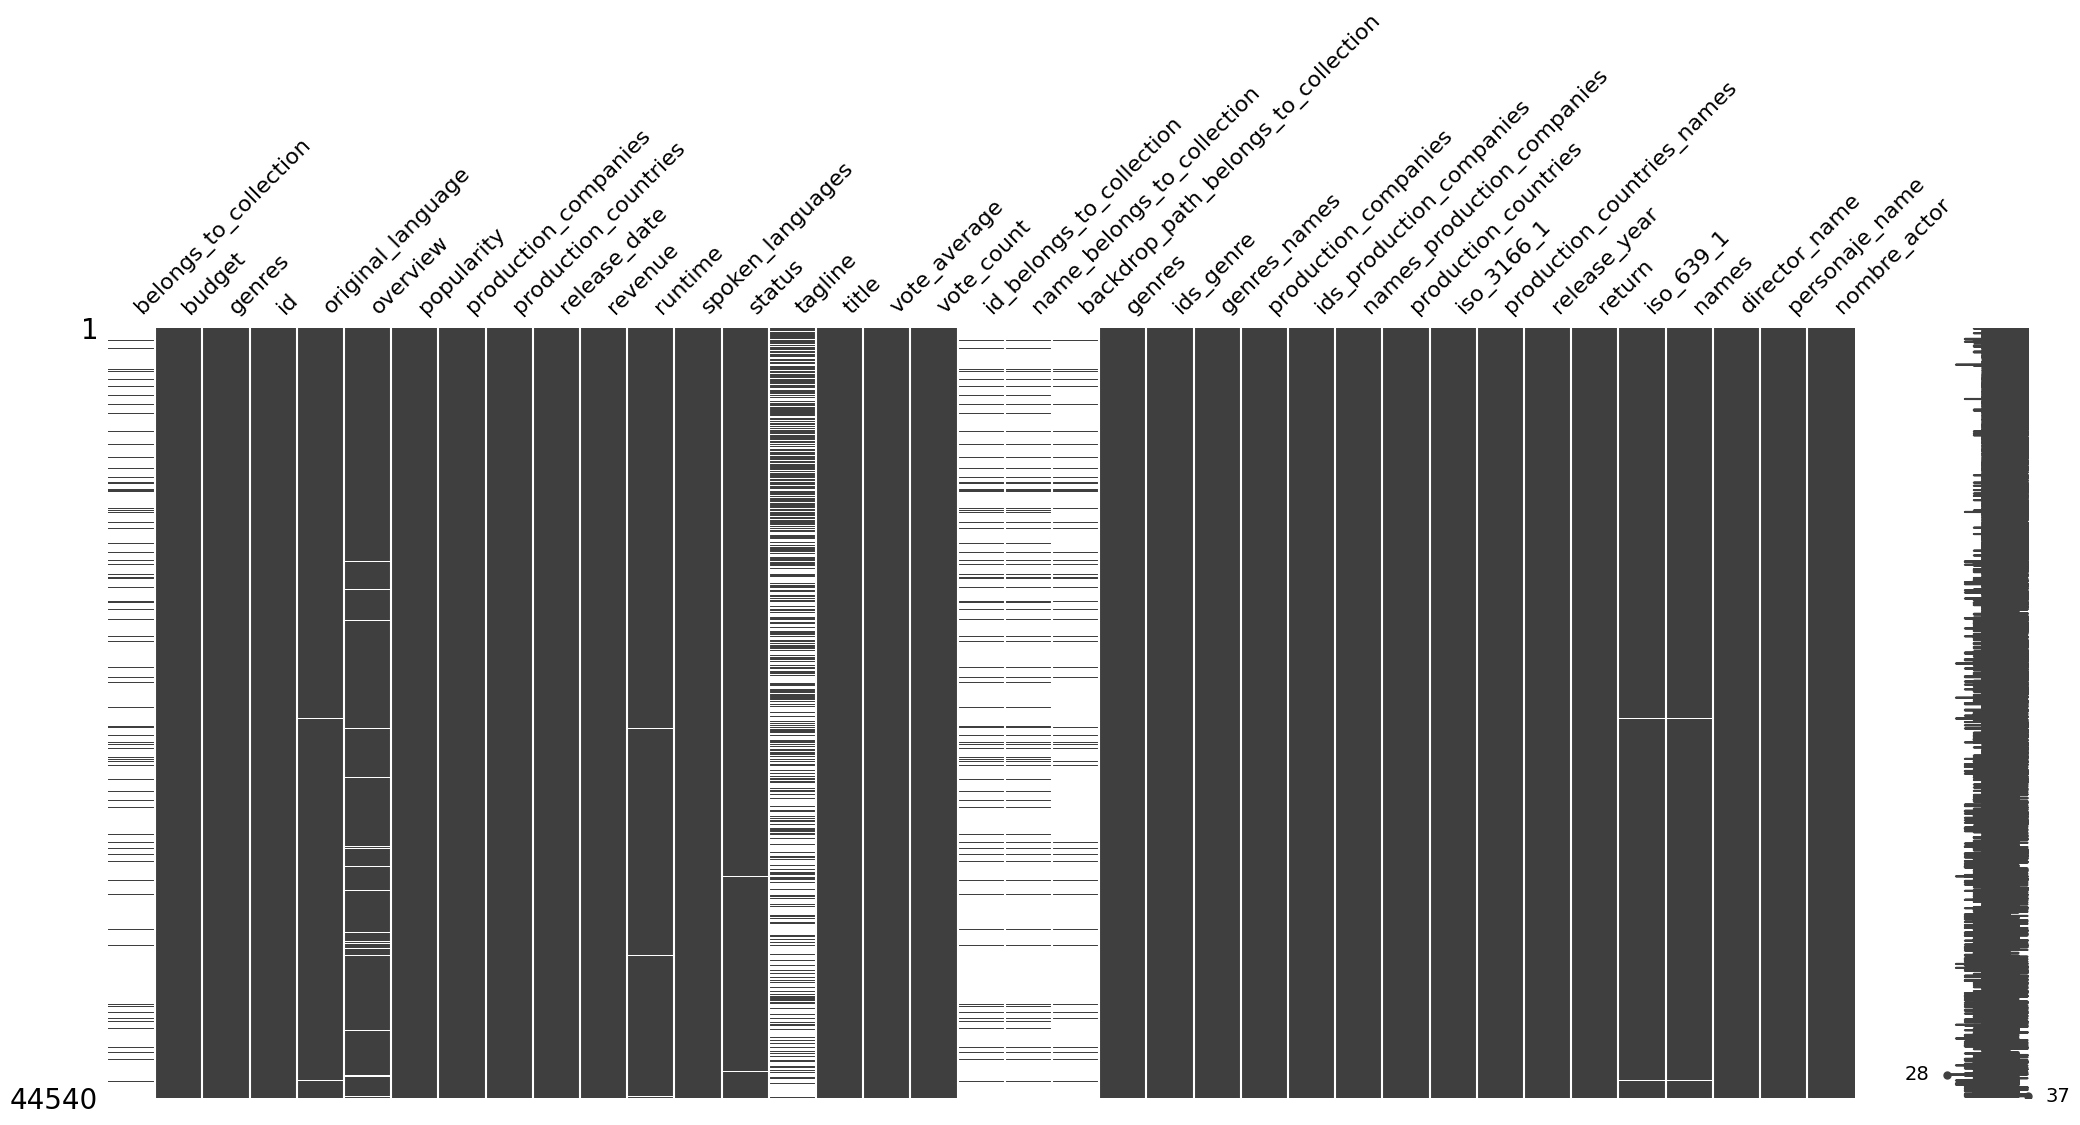

In [163]:
# Nulos por fila

msno.matrix(df)

In [164]:
# Son todas fotos de las peliculas que pertenecen a colecciones. Dato irrelevante 
# drop

df_backdrop_b_t_c =df["backdrop_path_belongs_to_collection"]
df_backdrop_b_t_c[df_backdrop_b_t_c.notnull()]

0        /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
2        /hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
4        /7qwE57OVZmMJChBpLEbJEmzUydk.jpg
9        /6VcVl48kNKvdXOZfJPdarlUGOsk.jpg
12       /9VM5LiJV0bGb1st1KyHA3cVnO2G.jpg
                       ...               
44430    /gl9Gi60C9WYVkObOMll19OROhMC.jpg
44432    /38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
44435    /38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
44445    /38tF1LJN7ULeZAuAfP7beaPMfcl.jpg
44458    /3fhHbLeO3DqdHvgHg5szs399eBb.jpg
Name: backdrop_path_belongs_to_collection, Length: 3236, dtype: object

In [165]:
df.drop(columns=['backdrop_path_belongs_to_collection'], inplace=True)

In [166]:
# No requieren tratamiento los valores faltantes

df_btc = df[["belongs_to_collection", "name_belongs_to_collection","id_belongs_to_collection"]]
df_btc[df_btc["id_belongs_to_collection"].notnull()]

belongs_to_collection  \
0      {'id': 10194, 'name': 'Toy Story Collection', ...   
2      {'id': 119050, 'name': 'Grumpy Old Men Collect...   
4      {'id': 96871, 'name': 'Father of the Bride Col...   
9      {'id': 645, 'name': 'James Bond Collection', '...   
12     {'id': 117693, 'name': 'Balto Collection', 'po...   
...                                                  ...   
44432  {'id': 37261, 'name': 'The Carry On Collection...   
44435  {'id': 37261, 'name': 'The Carry On Collection...   
44445  {'id': 37261, 'name': 'The Carry On Collection...   
44447  {'id': 477208, 'name': 'DC Super Hero Girls Co...   
44458  {'id': 200641, 'name': 'Red Lotus Collection',...   

           name_belongs_to_collection  id_belongs_to_collection  
0                Toy Story Collection                   10194.0  
2           Grumpy Old Men Collection                  119050.0  
4      Father of the Bride Collection                   96871.0  
9               James Bond Collection                     645.0  
12                   Balto Collection                  117693.0  
...                               ...                       ...  
44432         The Carry On Collection                   37261.0  
44435         The Carry On Collection                   37261.0  
44445         The Carry On Collection                   37261.0  
44447  DC Super Hero Girls Collection                  477208.0  
44458            Red Lotus Collection                  200641.0  

[4453 rows x 3 columns]

Esto nos dice que el 10 % de las peliculas forman parte de un coleccion

In [167]:
# Frase celebre asociadaa la pelicula. 
# Con lo cual no requieren tratamiento los datos faltantes
# 44.4 de las peliculas cuentan con una frase celebre.

df["tagline"]

0                                                      NaN
1                Roll the dice and unleash the excitement!
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
                               ...                        
44535                                                  NaN
44536                                                  NaN
44537                               A deadly game of wits.
44538                                                  NaN
44539                                                  NaN
Name: tagline, Length: 44540, dtype: object

In [168]:
df_money = df[["revenue", "budget","return"]]
return_na = df_money[df_money["return"].isnull()]
return_na["budget"].sum() # de los na de return, los budget figuran en 0, es por eso que vamos a imputar un 0 al 
#igual que hicimos antes con estas columnas
df["return"]  = df["return"].fillna(0)
df["return"].isnull().sum()# check que quedaron imputados ok

0

In [169]:
df["overview"]

# Pequeño resumen de la película
# Menos del 2% de las peliculas del df no cuentan con resumen. 
# No requieren tratamiento los valores faltantes

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
44535    Yet another version of the classic epic, with ...
44536    An artist struggles to finish his work while a...
44537    When one of her hits goes wrong, a professiona...
44538    In a small town live two brothers, one a minis...
44539    50 years after decriminalisation of homosexual...
Name: overview, Length: 44540, dtype: object

In [170]:
df_time =df[df["runtime"].isnull()]
df_time
valor_tiempo_medio = df["runtime"].mean()

# Imputo los pocos valores nulos (211) sin tiempo por la media
df["runtime"].fillna(valor_tiempo_medio, inplace=True)

In [171]:
df.runtime.value_counts()

90.0     2513
100.0    1447
95.0     1401
0.0      1322
93.0     1202
         ... 
271.0       1
357.0       1
234.0       1
219.0       1
780.0       1
Name: runtime, Length: 345, dtype: int64

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\1890088556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["runtime"])


<Axes: xlabel='runtime', ylabel='Density'>

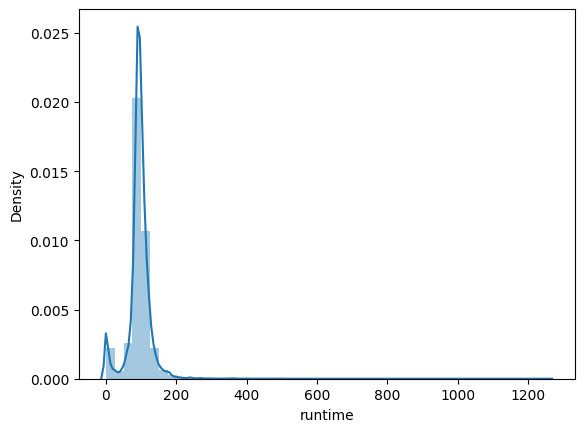

In [172]:
sns.distplot(df["runtime"])

Teniendo en cuenta lo que mencionabamos mas arriba, respecto a la duracion de las peliculas ("runtime"), notamos que la media es de 1 hora con 34 minutos, pero que el 50% de las peliculas se encuentran entre 1:25:00 y 1:47:00.
Por supuesto una pelicula, no puede no tener tiempo, es por ello que decidimos imputar estos valores por la media teniendo en cuenta la distribucion y que la gran mayoria tienen esa duracion.

In [173]:
status_na = df[df["status"].isnull()]
print("Datos nulos, columna status: ", len(status_na))
print("De estos nulos, se lanzaron en estos años las peliculas")
print("")
print(status_na.release_year.value_counts())
print("")
print(" El conteo de los valores de status actualmente es:")
df["status"].value_counts()


Datos nulos, columna status:  61
De estos nulos, se lanzaron en estos años las peliculas

2010.0    8
2008.0    4
2009.0    4
2001.0    4
2005.0    4
2012.0    4
2002.0    3
2011.0    3
2006.0    2
2004.0    2
1974.0    2
1997.0    2
1995.0    2
1989.0    2
1991.0    2
1998.0    2
1966.0    1
1987.0    1
1990.0    1
1976.0    1
1971.0    1
2003.0    1
1992.0    1
2000.0    1
1994.0    1
1988.0    1
1905.0    1
Name: release_year, dtype: int64

 El conteo de los valores de status actualmente es:


Released           44126
Rumored              223
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

Como son pocos valores y en su gran mayoria todos los valores del Dataset son "released", haremos de cuenta que fueron sacadas al mercado con status "released", tambien teniendo en cuenta que tuvieron fecha de lanzamiento

In [174]:
df["status"].fillna("Released", inplace=True)
df["status"].value_counts() # vemos que se imputaron ok

Released           44187
Rumored              223
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [175]:
df_lang = df[df["original_language"].isnull()]
df_lang[["overview", "tagline", "title"]]

# Si bien la gran mayoria de peliculas, aprox 70% son en ingles, y teniendo en cuenta que su pequeño resumen es en ingles,
# me parece oportuno imputarlas por "en", salvo "fr" al index que vemos con 43184 que tiene el titulo e idioma en frances.
# Lettre d'une inconnue

overview tagline  \
19405  Documentary about the production of The Third ...     NaN   
21386  An Outback farmer takes in an Afghani woman wh...     NaN   
22588  A group of Union Army soldiers is charged with...     NaN   
31716  George and Gracie enter an elegant drawing roo...     NaN   
36786  The first fairy tale transformed into a full-l...     NaN   
40305  Until the late 1970s, the Pakistani city of La...     NaN   
41095  Two dancers perform in succession facing a sta...     NaN   
43184                                                NaN     NaN   
43527  The traditional crafts of crochet and knitting...     NaN   
43688  American investment fund buys Austrian compani...     NaN   
43765  Three military men, seen inside a fortificatio...     NaN   

                            title  
19405     Shadowing the Third Man  
21386              Unfinished Sky  
22588             13 Fighting Men  
31716                   Lambchops  
36786               Prince Bayaya  
40305              Song of Lahore  
41095  Annabelle Serpentine Dance  
43184       Lettre d'une inconnue  
43527                        Yarn  
43688                      WiNWiN  
43765  The Surrender of Tournavos

In [176]:
ol_na_fr = df.loc[43184]
ol_na_fr[["production_companies", "spoken_languages","title", "production_countries"]]
# teniendo en cuenta el titulo, el idioma hablado y el pais de produccion es mas que acertado imputar fr por francia
df.loc[43184, "original_language"] = "fr"
df.loc[43184].original_language



'fr'

In [177]:
df_lang = df[df["original_language"].isnull()]
df_lang
# Resto de los valores los imputo por en como he dicho
df["original_language"].fillna("en", inplace=True)
df["original_language"].isnull().sum() # chequeo de que no hay mas nulos


0

In [178]:
df_code_pais = df[df["iso_639_1"].isnull()]
df_code_pais[["iso_639_1","names", "spoken_languages","title" ]]
df.loc[43184, "iso_639_1"] = "fr"
df.loc[43184, "names"] = ""

In [179]:
df_code_pais = df[df["iso_639_1"].isnull()]
df_code_pais[["iso_639_1","names","title" ]]
df["iso_639_1"].fillna("en", inplace = True)

In [180]:
df["iso_639_1"].isnull().sum() # check

0

In [181]:
df["names"].fillna("", inplace = True)
df["names"].isnull().sum()

0

#### EXPLORATORY DATA ANALYSIS - EDA

In [182]:
df.shape

(44540, 36)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44540 entries, 0 to 44539
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   belongs_to_collection       4453 non-null   object        
 1   budget                      44540 non-null  float64       
 2   genres                      44540 non-null  object        
 3   id                          44540 non-null  object        
 4   original_language           44540 non-null  object        
 5   overview                    43671 non-null  object        
 6   popularity                  44540 non-null  object        
 7   production_companies        44540 non-null  object        
 8   production_countries        44540 non-null  object        
 9   release_date                44540 non-null  datetime64[ns]
 10  revenue                     44540 non-null  float64       
 11  runtime                     44540 non-null  float64   

In [184]:
# Informe estadistico de las variables numericas. Primer nocion de informacion de lo que son los datos.
# Profundizacion de analisis luego

df.describe() #include="all")

budget       revenue       runtime  vote_average    vote_count  \
count  4.454000e+04  4.454000e+04  44540.000000  44540.000000  44540.000000   
mean   4.310801e+06  1.143997e+07     94.640709      5.653424    112.086753   
std    1.759293e+07  6.497296e+07     37.312432      1.870318    496.117600   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.000000      3.000000   
50%    0.000000e+00  0.000000e+00     95.000000      6.000000     10.000000   
75%    0.000000e+00  0.000000e+00    107.000000      6.800000     35.000000   
max    3.800000e+08  2.787965e+09   1256.000000     10.000000  14075.000000   

       id_belongs_to_collection  release_year        return  
count               4453.000000  44540.000000  4.454000e+04  
mean              183631.826185   1991.707499  6.724315e+02  
std               141513.518608     24.124821  7.539098e+04  
min                   10.000000   1874.000000  0.000000e+00  
25%                85945.000000   1978.000000  0.000000e+00  
50%               141290.000000   2001.000000  0.000000e+00  
75%               293981.000000   2010.000000  0.000000e+00  
max               480160.000000   2020.000000  1.239638e+07

##### ANALISIS UNIVARIADO

In [185]:
# Miro las columnas para poder realizar analisis univariado.

df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'genres', 'ids_genre', 'genres_names', 'production_companies',
       'ids_production_companies', 'names_production_companies',
       'production_countries', 'iso_3166_1', 'production_countries_names',
       'release_year', 'return', 'iso_639_1', 'names', 'director_name',
       'personaje_name', 'nombre_actor'],
      dtype='object')

###### "original_language"

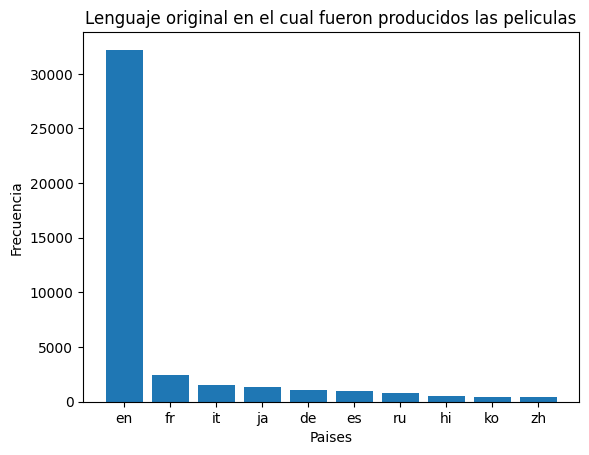

In [186]:
# Veo los lenguajes en los que las peliculas fueron desarrolladas

top_10_ol = movies_language.iloc[0:10]

plt.bar(top_10_ol.country_code.values, top_10_ol.original_language )

plt.xlabel('Paises')
plt.ylabel('Frecuencia')
plt.title('Lenguaje original en el cual fueron producidos las peliculas')

plt.show()

In [187]:
# Veo la cantidad pequeña de peliculas que fueron producidas en idiomas original

len(movies_language[movies_language["original_language"]<=5])

37

La mayoria de las peliculas estan producidas en los lenguajes mas comunes, sobre todo el ingles, que cuenta con 71% de las peliculas en este dataset.

Luego lo siguen, como era de esperar, los principales lenguajes del mundo pero en muy menor proporcion como demuestra el grafico.

El top 10 de las peliculas, con respecto a los lenguajes originales, componen el 91% del total del dataset. 

El dataset cuenta con "92" lenguajes, lo cual no es cierto porque hay datos erroneos en esas columnas como los numeros 82,104,68. Dentro de estos 89 lenguajes, 37 de ellos no cuentan con mas de 5 peliculas producidas en ese idioma, lo cual da una magnitud y relevancia del poco peso que tienen de peliculas.



###### "spoken_languages"

In [188]:
# Analiso columna de idiomas hablados en las peliculas
# Realizo un conteo para tener informacion de la cantidad de veces que se repite cada idioma

df_language
df_language_exploded_id = df_language["iso_639_1"].explode('iso_639_1')
df_language_exploded_name = df_language["names"].explode('names')
df_language_exploded_concat = pd.concat([df_language_exploded_id, df_language_exploded_name], axis=1)


In [189]:
df_language_exploded_concat.dropna(inplace= True)

In [190]:
df_conteo_lang = df_language_exploded_concat["iso_639_1"].value_counts()

In [191]:
# Armo top 10, para poder focalizar en los mas representativos

df_language_top_10 = df_conteo_lang.iloc[0:10]
df_language_top_10

en    28745
fr     4196
de     2625
es     2413
it     2367
ja     1758
ru     1563
zh      790
hi      707
pt      591
Name: iso_639_1, dtype: int64

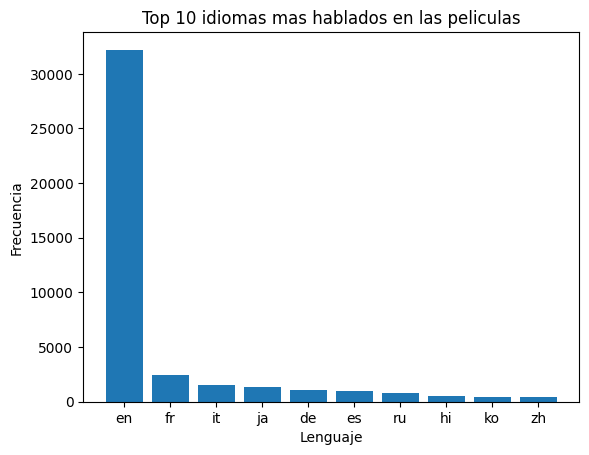

In [192]:
# Veamos los lenguajes en los que las peliculas son habladas

df_language_top_10 = movies_language.iloc[0:10]

plt.bar(df_language_top_10.country_code.values, df_language_top_10.original_language )

plt.xlabel('Lenguaje')
plt.ylabel('Frecuencia')
plt.title('Top 10 idiomas mas hablados en las peliculas')

plt.show()

In [193]:
print("Hay un ", round(df_language_exploded_concat.shape[0] / movies.shape[0] *100 -100 , 2) , "%  a las cual una pelicula fue traducida en al menos un idioma")


Hay un  17.46 %  a las cual una pelicula fue traducida en al menos un idioma


Por supuesto los lenguajes en los cuales la pelicula es reproducida son mayores, ya que es traducida a otros lenguajes.

Pero a groso modo mantienen lo mismo que veiamos en original language, en donde los idiomas mas hablados a nivel mundial, son a los que fueron doblados estas peliculas, y como era de esperar en mayor proporcion, ya que sobre todo hay peliculas dobladas a varios idiomas con mas llegada y adaptacion a los mercados locales.

###### "production_countries"

In [194]:
# Ahora con los paises productores de peliculas

df_countries_exploded_id = df_countries["iso_3166_1"].explode('iso_3166_1')
df_countries_exploded_name = df_countries["production_countries_names"].explode('production_countries_names')
df_countries_exploded_concat = pd.concat([df_countries_exploded_id, df_countries_exploded_name], axis=1)
df_countries_exploded_concat["iso_3166_1"].value_counts()

US    21153
GB     4094
FR     3940
DE     2254
IT     2169
      ...  
MG        1
SO        1
KW        1
MQ        1
GN        1
Name: iso_3166_1, Length: 161, dtype: int64

In [195]:
df_countries_top_10 = df_countries_exploded_concat["iso_3166_1"].value_counts()
df_countries_top_10 = df_countries_top_10.iloc[0:10]
df_countries_top_10.head()

US    21153
GB     4094
FR     3940
DE     2254
IT     2169
Name: iso_3166_1, dtype: int64

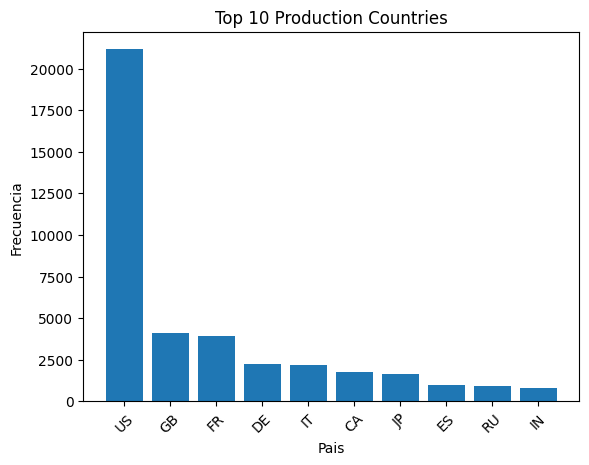

In [196]:
# Miro los mas representativos

df_countries_top_10 = df_countries_exploded_concat["iso_3166_1"].value_counts()
df_countries_top_10 = df_countries_top_10.iloc[0:10]
df_countries_top_10

plt.bar(df_countries_top_10.index, df_countries_top_10.values)

plt.xlabel('Pais')
plt.ylabel('Frecuencia')
plt.title('Top 10 Production Countries')

plt.xticks(rotation=45)

plt.show()

In [197]:

print("Hay al menos un ", round(df_countries_exploded_concat.shape[0] / movies.shape[0] *100 -100 , 2) , "%  en las cuales una pelicula fue producida en mas de un pais")

Hay al menos un  22.78 %  en las cuales una pelicula fue producida en mas de un pais


Vemos que en cuanto a la produccion de las peliculas con respecto a los paises, se repite el mismo patron que veniamos viendo. A diferencia de que hay aun mas movimiento, en cuanto a que se producen en mas paises las peliculas

###### "production_companies"

In [198]:
# Analisis de las compañias productoras de peliculas con el dataframe creado previamente

productoras_exitosas_df.head(20)

Production_Company  Movie_Count       revenue  \
0                                  Warner Bros.         1250  6.352519e+10   
1                     Metro-Goldwyn-Mayer (MGM)         1076  1.237679e+10   
2                            Paramount Pictures         1003  4.880819e+10   
3        Twentieth Century Fox Film Corporation          836  4.768775e+10   
4                            Universal Pictures          830  5.525919e+10   
5                 Columbia Pictures Corporation          448  1.134909e+10   
6                                        Canal+          438  6.214656e+09   
7                             Columbia Pictures          431  3.227974e+10   
8                            RKO Radio Pictures          290  1.122452e+09   
9                                United Artists          279  5.958309e+09   
10                              New Line Cinema          277  2.217339e+10   
11                         Walt Disney Pictures          263  4.083727e+10   
12                          Touchstone Pictures          225  1.412178e+10   
13                             TriStar Pictures          197  8.022367e+09   
14                                      Mosfilm          188  1.864355e+07   
15                                Miramax Films          183  5.783693e+09   
16                              France 2 Cinéma          168  5.103732e+08   
17  Centre National de la Cinématographie (CNC)          163  2.072581e+08   
18                                 Toho Company          142  1.262973e+09   
19                                    BBC Films          131  1.319821e+09   

    ganancia_promedio_por_franquicia  
0                       5.082015e+07  
1                       1.150259e+07  
2                       4.866221e+07  
3                       5.704276e+07  
4                       6.657734e+07  
5                       2.533279e+07  
6                       1.418871e+07  
7                       7.489498e+07  
8                       3.870522e+06  
9                       2.135595e+07  
10                      8.004834e+07  
11                      1.552748e+08  
12                      6.276349e+07  
13                      4.072267e+07  
14                      9.916784e+04  
15                      3.160488e+07  
16                      3.037936e+06  
17                      1.271522e+06  
18                      8.894174e+06  
19                      1.007497e+07

In [199]:
print("Compañias que producieron por encima de las 50 producciones: ",productoras_exitosas_df[productoras_exitosas_df["Movie_Count"]>50].shape[0])
print("Total de compañias productoras: ", productoras_exitosas_df.shape[0])


Compañias que producieron por encima de las 50 producciones:  98
Total de compañias productoras:  23533


Hay varias productoras de peliculas en este dataset, estan las mas exitosas con su alta produccion de peliculas, el top 20 seteado por encima de las 130 peliculas producidas.

98 compañias exitosas producieron por encima de las 50 peliculas.

Pero como podemos ver en esta categoria, la de empresas productoras esta mucho mas customizada, lo cual es logico, habiendo un total de 23533 compañias en este dataset.

###### "bellongs_to_collection"

In [200]:
# Peliculas con coleccion

btc = df_btc[df_btc["id_belongs_to_collection"].notnull()].shape[0]


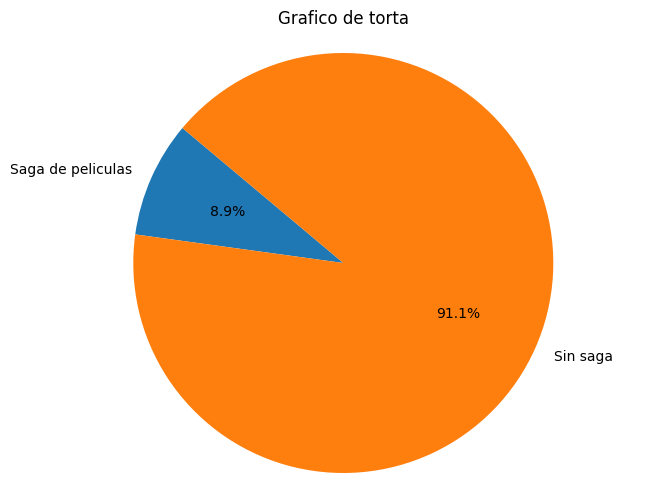

In [201]:
# Vemos el porcentaje de peso en el total del df.

titulo = ['Saga de peliculas', 'Sin saga']
torta = [btc, movies.shape[0]]

plt.figure(figsize=(8, 6))
plt.pie(torta, labels=titulo, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Grafico de torta')

plt.show()

Un 8,9% de las peliculas poseen sagas, es decir, que no fueron creadas por unica vez, si no que tuvieron continuacion en peliculas contiguas

###### "status"

In [202]:
# Vemos el estado de las peliculas

df_status = df["status"].value_counts()
df_status

Released           44187
Rumored              223
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

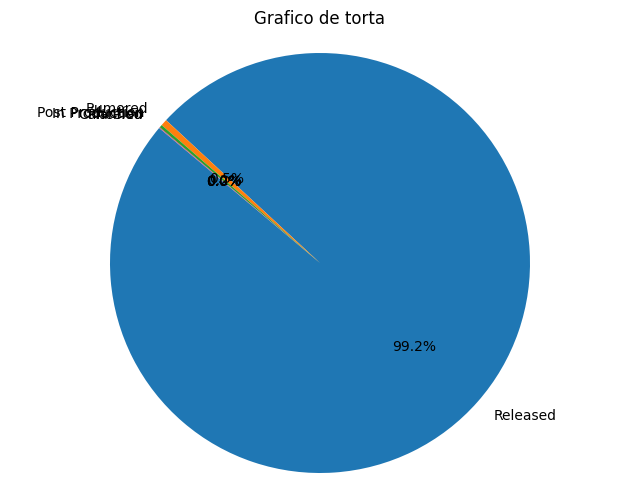

In [203]:
# Grafico que nos muestra el % representativo de los estados

plt.figure(figsize=(8, 6))
plt.pie(df_status,labels= df_status.index,  autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Grafico de torta')

plt.show()

Voy a considerar solo las peliculas que fueron lanzadas, que son la gran mayoria y que son las de interes para analizar y para poder realizar el modelo de recomendacion de peliculas

In [204]:
df = df[df["status"]=="Released"]

###### "release_date" | "release_year"

In [205]:
# Analisis con las fechas de estreno de las peliculas

df.release_year.value_counts()

2014.0    1917
2013.0    1843
2015.0    1836
2012.0    1684
2011.0    1607
          ... 
1887.0       1
1878.0       1
1874.0       1
1893.0       1
1883.0       1
Name: release_year, Length: 133, dtype: int64

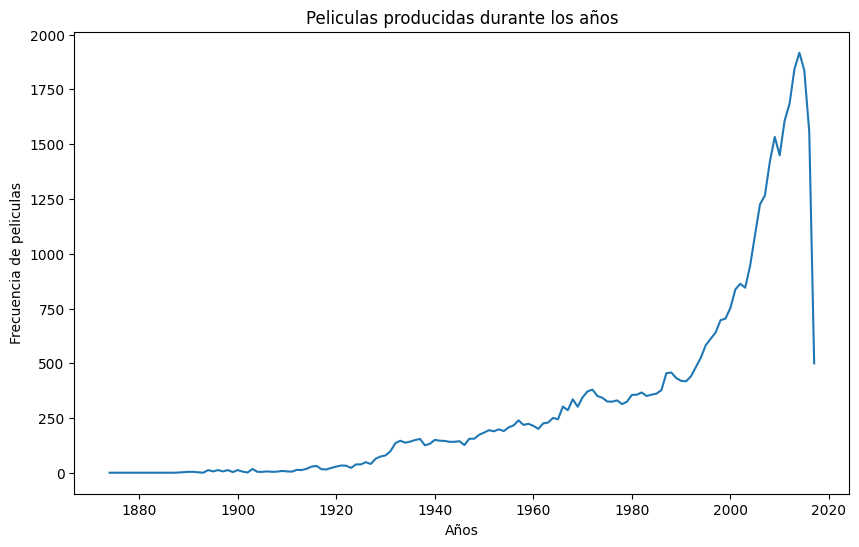

In [206]:
# Grafico de linea, para visualizar la evolucion de estrenos durante los años

plt.figure(figsize=(10, 6))
sns.lineplot(df.release_year.value_counts())

plt.title("Peliculas producidas durante los años")
plt.xlabel("Años")
plt.ylabel("Frecuencia de peliculas")


plt.show()

In [207]:
# Veo los años de menor a mayor, para poder ver picos y rango

np.sort(df.release_year.unique())

array([1874., 1878., 1883., 1887., 1888., 1890., 1891., 1892., 1893.,
       1894., 1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902.,
       1903., 1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911.,
       1912., 1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929.,
       1930., 1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938.,
       1939., 1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947.,
       1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012.,

In [208]:
df_viejas = df[df["release_year"]<=1895]
df_viejas[["title", "release_date", "release_year", "overview", "runtime" ]].sort_values(by= "release_year")

title release_date  \
34437                              Passage of Venus   1874-12-09   
34434                    Sallie Gardner at a Gallop   1878-06-14   
40840                               Buffalo Running   1883-11-19   
34430                   Man Walking Around a Corner   1887-08-18   
34431                              Accordion Player   1888-01-01   
34435                 Traffic Crossing Leeds Bridge   1888-10-15   
34433                           Monkeyshines, No. 2   1890-11-21   
34432                           Monkeyshines, No. 1   1890-11-21   
34436                     London's Trafalgar Square   1890-01-01   
39250                           Monkeyshines, No. 3   1890-11-21   
40444                                     Mosquinha   1890-03-09   
28270                              Dickson Greeting   1891-01-01   
34635                                      La Vague   1891-11-15   
40445                                  Je Vous Aime   1891-01-01   
34442                                Newark Athlete   1891-05-01   
34569                                    Men Boxing   1891-04-30   
34636                                  A Hand Shake   1892-01-01   
34702                                       Fencing   1892-01-01   
31877                                  Poor Pierrot   1892-10-28   
18991                              Blacksmith Scene   1893-05-08   
41894                                 Buffalo Dance   1894-09-23   
42671                                The Barbershop   1894-01-01   
41423                                   Falling Cat   1894-01-01   
42712  The Pickaninny Dance from the “Passing Show”   1894-05-16   
42924                                    Carmencita   1894-03-14   
41099                                  Annie Oakley   1894-11-01   
41098                                  Hadj Cheriff   1894-10-05   
41096                             Sioux Ghost Dance   1894-09-23   
17454        Edison Kinetoscopic Record of a Sneeze   1894-01-09   
41094              The Boxing Cats (Prof. Welton's)   1894-07-16   
41026      Souvenir Strip of the Edison Kinetoscope   1894-05-18   
44061                Luis Martinetti, Contortionist   1894-01-01   
18870               Dickson Experimental Sound Film   1894-08-31   
41088                                   Baby's Meal   1895-12-27   
39251                          Wintergartenprogramm   1895-11-01   
42668         The Execution of Mary, Queen of Scots   1895-08-28   
25612           Workers Leaving the Lumière Factory   1895-06-10   
23558                 Tables Turned on the Gardener   1895-12-27   
41095                    Annabelle Serpentine Dance   1895-04-01   
44494                               Baignade en Mer   1895-12-28   

       release_year                                           overview  \
34437        1874.0  Photo sequence of the rare transit of Venus ov...   
34434        1878.0  Sallie Gardner at a Gallop was one of the earl...   
40840        1883.0  Individual photographs of the running of a buf...   
34430        1887.0  The last remaining production of Le Prince's L...   
34431        1888.0  The last remaining film of Le Prince's LPCCP T...   
34435        1888.0  A film by Louis Aimé Augustin Le Prince, shot ...   
34433        1890.0  Experimental film that follows up on the resul...   
34432        1890.0  Experimental film made to test the original cy...   
34436        1890.0  Moving picture of London's Trafalgar Square tr...   
39250        1890.0  Experimental film that follows up on the resul...   
40444        1890.0                       Shot of the flight of a fly.   
28270        1891.0  William K.L. Dickson brings his hat from his o...   
34635        1891.0  Experimental film of a wave, recorded on the b...   
40445        1891.0  This early cinematic instance of a close-up—or...   
34442        1891.0  Experimental film fragment made with the Ediso...   
34569        1891.0  Experimental film fragment made with the Ediso...   

El cine  y la primera reproduccion al publico considerada "pelicula", fue desarrollada en 1895 por los hermanos Lumiere, con el titulo de "Workers Leaving the Lumière Factory", presentada en 1895-06-10.

Este dato me llamo la atencion por el hecho de contar  con peliculas tan viejas e investigando las peliculas descriptas en el dataset (como podran ver en la tabla previa) y considerando que el cine fue inventado en 1895, vi que son secuencias de fotos y es por eso que deben estar ingresadas al dataset, sus duraciones son menores al minuto.

Como nos muestra el grafico de linea (evolucion a traves del tiempo), hay ciertos hitos y tendencias que marcaron la historia del cine. A continuacion, dare un breve pasaje por lo que fue la historia del cine, como se fue desarrollando la historia del cine, y como ciertos hitos historicos, sociales y tecnologicas contribuyeron al desarrollo de la industria.

Puntualmente, el 28 de diciembre de 1895, los hermanos Lumière proyectaron una serie de cortometrajes en París, lo que se considera una de las primeras proyecciones públicas de películas en movimiento. Esta fecha a menudo se toma como el comienzo oficial del cine.

Luego, vino el Technicolor en las décadas de 1910 y 1920 lo que llevó al uso más generalizado y a la mejora en la calidad del color en el cine.

Durante esos años posteriores, hasta la decada del 1930, las peliculas eran en blanco y negro. A partir de la decada del 30, acompañado de ciertos hitos las peliculas comenzaron a desarrollarse en mayor cantidad. Estos hitos fueron: El sonido y el habla (anteriormente sin sonido), nacimiento de los musicales, "estreno" de las estrellas de cine y glamour, expansion de generos. Además del sonido, hubo avances técnicos en áreas como la cinematografía, la iluminación y la edición. Estos avances permitieron una mayor calidad visual y narrativa en las películas. Lo que resultó en una mayor popularidad, diversidad y sofisticación de las películas.


Posterior le siguieron las peliculas animadas en los años 40. Snow White and the Seven Dwarfs (1937), esta película,  producida por Walt Disney, es considerada la primera película animada en color y uno de los primeros largometrajes animados. Fue un gran hito en la historia de la animación.

Luego en 1960, tambien se nota otra marcada tendencia del incremento de peliculas producidas. Esto se debe a ciertos factores:

- Surgió lo que se conoció como el "Nuevo Hollywood", donde directores jóvenes y ambiciosos comenzaron a desafiar las convenciones y a explorar temas más oscuros y realistas.

- A nivel global, surgieron movimientos cinematográficos influyentes, como la Nouvelle Vague en Francia y el Neorrealismo italiano. Estos movimientos buscaban formas frescas y auténticas de narrar historias en la pantalla.

-  A medida que las películas se volvían más accesibles y la globalización avanzaba, el cine de diferentes países y culturas ganó popularidad en todo el mundo.


Tambien hay otro crecimiento exponencial marcado en los años 80, ya que las innovaciones tecnológicas, como el uso de efectos especiales y el formato widescreen, permitieron nuevas posibilidades visuales en el cine. A finales de la década de 1970 y principios de la década de 1980, surgieron películas de gran presupuesto con un enfoque en el entretenimiento a gran escala. "Star Wars" (1977) y "Jaws" (1975) son ejemplos destacados de películas que dieron lugar al cine de blockbusters.

 A medida que las películas se volvían más accesibles y la globalización avanzaba, el cine de diferentes países y culturas ganó popularidad en todo el mundo.

 A partir de la década de 1990, sobre todo de los 2000 en adelante,  la tecnología digital comenzó a revolucionar la producción y distribución de películas. El auge de Internet también cambió la forma en que las películas se promocionaban y se distribuían.Acompañado a ello vino el apogeo de un monton de peliculas junto a avances tecnologicos y desarrollo exponencial de la industria cinematografica.



In [209]:
# Extraigo los dias en los cuales las peliculas fueron estrenadas

df['release_date'] = pd.to_datetime(df['release_date'])
df_fechas = df['release_date']
df_fechas['weekday'] = df['release_date'].dt.day_name() 

dias_peliculas = df_fechas['weekday'].value_counts()
dias_peliculas
 

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\2295037875.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['weekday'] = df['release_date'].dt.day_name()


Friday       13601
Thursday      7341
Wednesday     6884
Saturday      5015
Tuesday       4473
Sunday        3479
Monday        3394
Name: release_date, dtype: int64

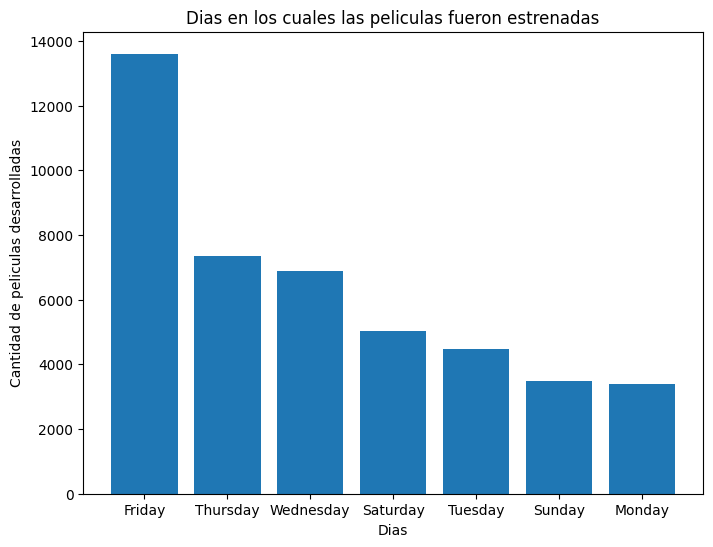

In [210]:
# Grafico comparativo de barras para poder ver la cantidad de peliculas estranadas en los dias de la semana.

plt.figure(figsize=(8, 6))
plt.bar(dias_peliculas.index, dias_peliculas.values)

plt.xlabel('Dias')
plt.ylabel('Cantidad de peliculas desarrolladas')
plt.title('Dias en los cuales las peliculas fueron estrenadas')

plt.show()

Este grafico muestra, los dias en los cuales las peliculas fueron lanzadas. 

Lo cual tiene logica, ya que al ser industria de entretenimiento, vemos que esta focalizado en los dias previos al fin de semana, que es cuando el cine tanta concurrencia.

###### "runtime"

In [211]:
# Breve resumen de la columna

df["runtime"].describe()

count    44187.000000
mean        94.730597
std         37.297289
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\4008489071.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["runtime"])


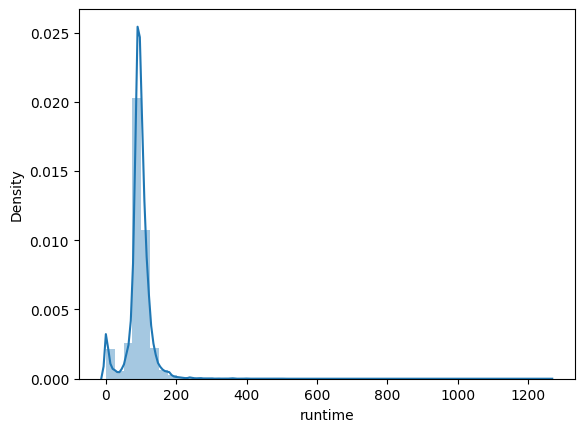

In [212]:
# Grafico mostrando la distribucion del tiempo de duracion de peliculas

sns.distplot(df["runtime"])
plt.show()

In [213]:
print("Peliculas consideradas outliers, con duraciones mayores a 3 horas. Representan un: ", round(df[df["runtime"]>180].shape[0]/df.shape[0]*100,2))

Peliculas consideradas outliers, con duraciones mayores a 3 horas. Representan un:  1.11


In [214]:
# Filtro estas mismas para ver de que tratan. 

time = df[df["runtime"]>300]
time[["title", "overview", "tagline", "runtime"]].sort_values(by = "runtime", ascending = False)

title  \
23914                      Centennial   
19788                            Jazz   
40200                        Baseball   
13703           Berlin Alexanderplatz   
13886  Heimat: A Chronicle of Germany   
...                               ...   
8711                             1900   
11598              Eight Deadly Shots   
7894                       The Deluge   
33547               If Tomorrow Comes   
41252               The Miracle Rider   

                                                overview  \
23914  The economic and cultural growth of Colorado s...   
19788  A survey of the musical form's history and maj...   
40200  Chronicles the sport's signature people, place...   
13703  Berlin Alexanderplatz, originally broadcast in...   
13886  This epic tale of a family and their rural lif...   
...                                                  ...   
8711   Set in Bertolucci's ancestral region of Emilia...   
11598  Small-farmer Pasi shoots four policemen who ha...   
7894   Following With Fire and Sword', this is an ada...   
33547  This mini-series focuses on two people, Tracy ...   
41252  In 1930s Texas, following the murder of his fa...   

                                                 tagline  runtime  
23914                                                NaN   1256.0  
19788                                                NaN   1140.0  
40200                                                NaN   1140.0  
13703                                                NaN    931.0  
13886                                                NaN    925.0  
...                                                  ...      ...  
8711                                                 NaN    317.0  
11598                                                NaN    316.0  
7894                               Academy Award Nominee    315.0  
33547                     The excitement is in the chase    313.0  
41252  Idol of every Boy in the World - Greatest West...    306.0  

[95 rows x 4 columns]

En la columna "runtime", duracion de las peliculas en minutos, notamos que la media es de 1 hora con 34 minutos, pero que el 50% de las peliculas se encuentran entre 1:25:00 y 1:47:00.

Tambien podemos ver que hay varias peliculas del dataset con poca duracion, esto si bien llama la atencion, sabemos que hay cortometrajes que no tienen mucha duracion.

Hay algunos outliers, ya que hay valores mayores a las 3 horas, son 490 peliculas (1,1% del total del dataset). La pelicula del dataset, con mayor duracion es de 1256 minutos, lo que representan casi 21 horas, muy extraño.

###### "popularity"

In [215]:
# Veo la metrica de popularidad

df["popularity"] = df["popularity"].astype(float)
df["popularity"].describe()

count    44187.000000
mean         2.987338
std          6.068125
min          0.000000
25%          0.411953
50%          1.171280
75%          3.843353
max        547.488298
Name: popularity, dtype: float64

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\4186202356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["popularity"])


<Axes: xlabel='popularity', ylabel='Density'>

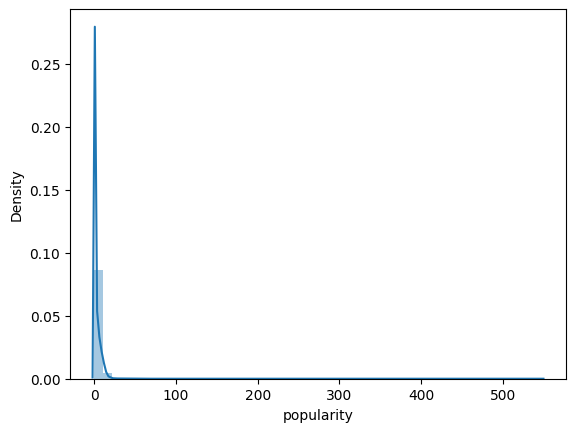

In [216]:
# Distribucion del indicador de popularidad

sns.distplot(df["popularity"])

In [217]:
# La mayoria de puntos estan por debajo del 10 de popularidad.

df[df["popularity"]>10].sort_values(by="popularity")

belongs_to_collection       budget  \
37514                                               None   30000000.0   
16860  {'id': 2602, 'name': 'Scream Collection', 'pos...   40000000.0   
6832                                                None   18000000.0   
2948                                                None    8272296.0   
29378                                               None          0.0   
...                                                  ...          ...   
24187                                               None  165000000.0   
42798                                               None   34000000.0   
41437                                               None  160000000.0   
32909  {'id': 468552, 'name': 'Wonder Woman Collectio...  149000000.0   
30320  {'id': 86066, 'name': 'Despicable Me Collectio...   74000000.0   

                                                  genres      id  \
37514  {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'nam...  322240   
16860  {'id': 27, 'name': 'Horror'}, {'id': 9648, 'na...   41446   
6832                         {'id': 18, 'name': 'Drama'}   18410   
2948   {'id': 35, 'name': 'Comedy'}, {'id': 18, 'name...      99   
29378                       {'id': 28, 'name': 'Action'}  283322   
...                                                  ...     ...   
24187  {'id': 12, 'name': 'Adventure'}, {'id': 10751,...  177572   
42798  {'id': 28, 'name': 'Action'}, {'id': 80, 'name...  339403   
41437  {'id': 10751, 'name': 'Family'}, {'id': 14, 'n...  321612   
32909  {'id': 28, 'name': 'Action'}, {'id': 12, 'name...  297762   
30320  {'id': 10751, 'name': 'Family'}, {'id': 16, 'n...  211672   

      original_language                                           overview  \
37514                en  A stuffy businessman finds himself trapped ins...   
16860                en  Sidney Prescott, now the author of a self-help...   
6832                 en  A young inductee into the military is given th...   
2948                 es  A single mother in Madrid sees her only son di...   
29378                en  Hongi, a Maori chieftain’s teenage son, must a...   
...                 ...                                                ...   
24187                en  The special bond that develops between plus-si...   
42798                en  After being coerced into working for a crime b...   
41437                en  A live-action adaptation of Disney's version o...   
32909                en  An Amazon princess comes to the world of Man t...   
30320                en  Minions Stuart, Kevin and Bob are recruited by...   

       popularity                               production_companies  \
37514   10.000208  {'name': 'EuropaCorp', 'id': 6896}, {'name': '...   
16860   10.000721            {'name': 'Dimension Films', 'id': 7405}   
6832    10.000775  {'name': '20th Century Fox', 'id': 25}, {'name...   
2948    10.000915  {'name': 'Renn Productions', 'id': 82}, {'name...   
29378   10.001517  {'name': 'General Film Corporation', 'id': 13742}   
...           ...                                                ...   
24187  213.849907  {'name': 'Walt Disney Pictures', 'id': 2}, {'n...   
42798  228.032744  {'name': 'Big Talk Productions', 'id': 443}, {...   
41437  287.253654  {'name': 'Walt Disney Pictures', 'id': 2}, {'n...   
32909  294.337037  {'name': 'Dune Entertainment', 'id': 444}, {'n...   
30320  547.488298  {'name': 'Universal Pictures', 'id': 33}, {'na...   

                                    production_countries release_date  ...  \
37514  {'iso_3166_1': 'CN', 'name': 'China'}, {'iso_3...   2016-08-03  ...   
16860  {'iso_3166_1': 'US', 'name': 'United States of...   2011-04-11  ...   
6832   {'iso_3166_1': 'US', 'name': 'United States of...   1987-04-17  ...   
2948   {'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_3...   1999-04-19  ...   
29378        {'iso_3166_1': 'NZ', 'name': 'New Zealand'}   2014-09-04  ...   
...                                                  ...          ...  

Segun la pagina de TMDB: Popularity es una metrica muy importante en TMDB (The Movie DataBase), los ayuda a potenciar los resultados de busqueda, añade un increible y util orden para el descubrimiento. 

Popularidad lo calculan de la siguiente forma:

- Numero de votos por dia
- Numero de vistas por dia
- Numero de usuarios que marcaron la pelicula como "favorita" por dia
- Numero de usuarios que agregaron la pelicula a su "lista de reproduccion" por dia
- Fecha de lanzamiento
- Numero de total votos
- Puntaje del dia anterior


Con respecto a este indicador, la gran mayoria de los datos, todos menos 3017 registros se encuentran por debajo de los 10 puntos de popularidad.



###### "vote_average"

In [218]:
# Descripcion de la variable de puntaje promedio de las peliculas, en una escala del 1 al 10.

df["vote_average"].describe()

count    44187.000000
mean         5.655989
std          1.866078
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

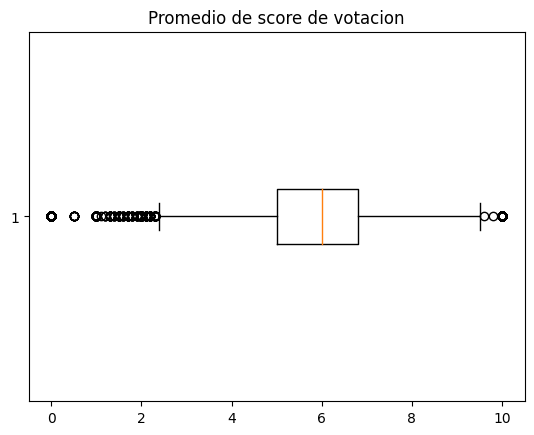

In [219]:
# Realizo un grafico de caja viendo los valores con sus medidas de tendencia central

plt.boxplot(df['vote_average'], vert=False)  

plt.title('Promedio de score de votacion')

plt.show()

En cuanto a "vote_average", el puntaje de la pelicula, se encuentra dentro de una escala de 0 a 10, donde vemos que el 50% central se encuentra entre 5 y 6.8, al igual que su media en 5,6. 
 

###### "budget"

<Axes: xlabel='budget', ylabel='Count'>

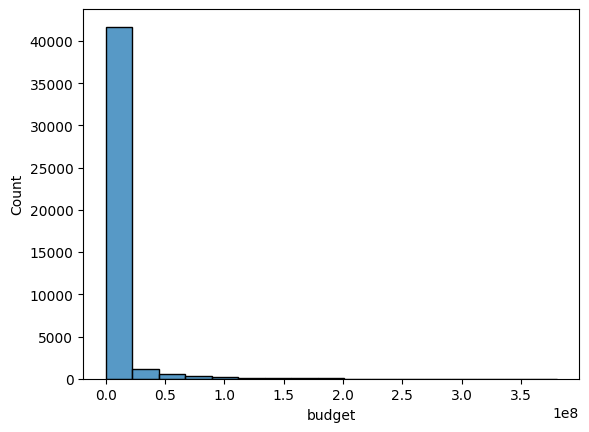

In [220]:
# Histograma de la columna presupuesto.

sns.histplot(df["budget"])

In [221]:
# Gran cantidad de valores en 0

print("Valores de budget en 0: ",df.budget.value_counts()[0])
print("Lo que representa un ", round(df.budget.value_counts()[0]/df.shape[0],2), "% total del dataset")


Valores de budget en 0:  35358
Lo que representa un  0.8 % total del dataset


Vemos igual que hay varios valores de budget en 0, esto se puede deber a que la data fue mal cargada, o a que hubo confidencialidad y no se quiso compartir el dato, pero el peso es muy significativo.

Y distorsiona poder realizar un analisis que no este sesgado por la falta de informacion.

###### "revenue"

<Axes: xlabel='revenue', ylabel='Count'>

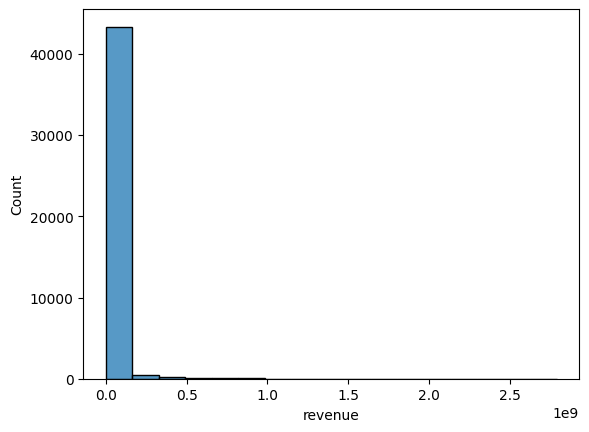

In [222]:
# Histograma para ver la distribucion de revenue

sns.histplot(df["revenue"])

In [223]:
# Aun mas valores en 0

print("Valores de revenue en 0: ",df.revenue.value_counts()[0])
print("Lo que representa un ", round(df.revenue.value_counts()[0]/df.shape[0],2), "% total del dataset")

Valores de revenue en 0:  36803
Lo que representa un  0.83 % total del dataset


Se repite el mismo patron para el revenue de las peliculas, e incluso en esta variable hay aun mayor cantidad de registros con valor 0.

###### "return"

<Axes: xlabel='return', ylabel='Count'>

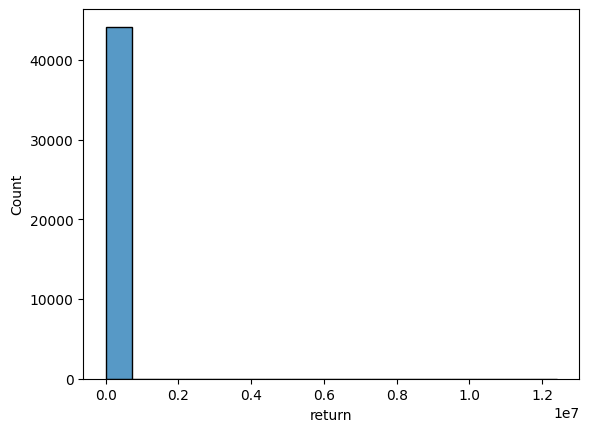

In [224]:
# Misma distribucion, columna derivada de las dos previas

sns.histplot(df["return"])

In [225]:
# Aun mayor cantidad de datos en 0

print("Valores de return en 0: ",df["return"].value_counts()[0])
print("Lo que representa un ", round(df["return"].value_counts()[0]/df.shape[0],2), "% total del dataset")

Valores de return en 0:  38815
Lo que representa un  0.88 % total del dataset


En return, que es una columna calculada de "revenue" y "budget", sigue el mismo patron de varios valores con 0.

###### "genres"

In [226]:
# Detalles de la columna generos

df_genres.head()
df_exploded_id = df_genres["ids_genre"].explode('ids_genre')
df_exploded_id.head()
df_exploded_name = df_genres["genres_names"].explode('genres_names')
df_exploded_name.head()
df_genres_concat = pd.concat([df_exploded_id, df_exploded_name], axis=1)
print("Total de generos de peliculas en el dataset: ", df_genres_concat.value_counts().sum())
print("Total de peliculas en el dataset: ", df.shape[0])
print("Es decir que al menos cada pelicula tiene un ratio de generos de: ", round(df_genres_concat.value_counts().sum()/df.shape[0],2), " a 1")

Total de generos de peliculas en el dataset:  91106
Total de peliculas en el dataset:  44187
Es decir que al menos cada pelicula tiene un ratio de generos de:  2.06  a 1


In [227]:
df_genres_conte = df_genres_concat.value_counts("genres_names")
df_genres_conte = df_genres_conte[df_genres_conte>5]

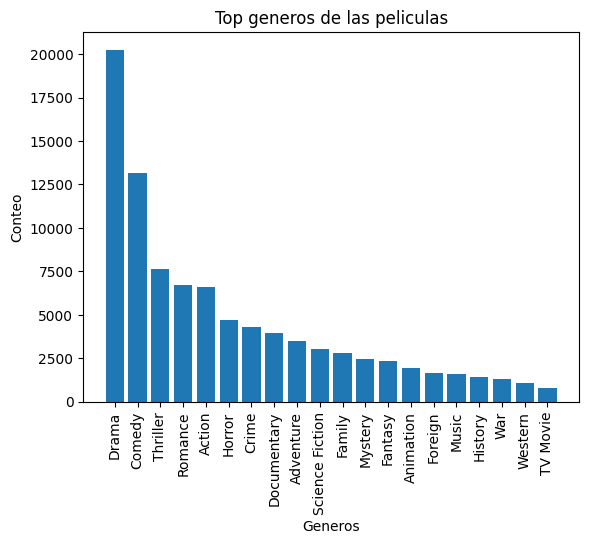

In [228]:
# Grafico de barras con el conteo de los generos

plt.bar(df_genres_conte.index, df_genres_conte.values)

plt.xlabel('Generos')
plt.ylabel('Conteo')
plt.title('Top generos de las peliculas')
plt.xticks(rotation='vertical')

plt.show()

In [229]:
a =df_genres_concat.drop_duplicates()
a.shape[0]

33

En el total del dataset hay 33 generos en los cuales las peliculas fueron categorizadas. A su vez, uno o varios generos pueden pertenecer a una pelicula, de hecho el ratio es 2 a 1 de generos a peliculas, o sea que al menos cada pelicula posee 2 generos.

Los generos con las que mayores peliculas cuenta el dataset son Drama, Comedia, Thriller, Romance y Accion



###### "director_name"

In [230]:
# Analisis de los directores de las peliculas

nombre_directores = directores["director_name"].value_counts()
nombre_directores.shape[0]

17548

In [231]:
# Ranking de los directores y la cantidad de peliculas producidas

nombre_directores

John Ford            66
Michael Curtiz       65
Werner Herzog        54
Alfred Hitchcock     53
Georges Méliès       51
                     ..
Burt Brinckerhoff     1
Søren Balle           1
Kurando Mitsutake     1
David Oliveras        1
Daisy Asquith         1
Name: director_name, Length: 17548, dtype: int64

En el total del dataset, hay 17548 directores. El que mayor peliculas dirigio del dataset es John Ford con 66

Pueden llegar a ver mas de un director por pelicula

###### "nombre_actor"

In [232]:
# Analisis columna actores

nro_actores = actores["nombre_actor"].value_counts()
nro_actores.shape[0]

202748

In [233]:
print("Total de generos de peliculas en el dataset: ", actores.value_counts().sum())
print("Total de peliculas en el dataset: ", df.shape[0])
print("Es decir que al menos cada pelicula tiene un ratio de generos de: ", round(actores.value_counts().sum().sum()/df.shape[0],2), " a 1")

Total de generos de peliculas en el dataset:  564892
Total de peliculas en el dataset:  44187


Es decir que al menos cada pelicula tiene un ratio de generos de:  12.78  a 1


En el total de dataset, tenemos 202748 actores que han interpretado un rol como actores o como voces de personajes animados. 

En promedio por cada pelicula actuan 13 actores

#### Analisis bivariado

In [234]:
# Evolucion de presupuestos y ganancias a traves del tiempo

evolution = df[["release_year", "budget","revenue","title"]]
evolution = evolution.groupby(["release_year"])["budget","revenue"].sum().reset_index()

fig = px.line(evolution, x=evolution['release_year'], y=evolution['revenue'])

fig.add_scatter(x=evolution['release_year'], y=evolution['budget'])
fig.show()

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\3260941833.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  evolution = evolution.groupby(["release_year"])["budget","revenue"].sum().reset_index()


Vemos en este grafico, la relacion entre presupuesto y ganancias a lo largo de los años, se nota esa brecha en la cual las peliculas duplican o multiplican ampliamente el presupuesto gastado.

In [235]:
# Scatter para ver las peliculas y sus ganancias a traves del tiempo

fig = px.scatter( df, x="release_year", y="revenue", hover_data = 'title', title="Peliculas y sus ganancias en el tiempo")

fig.show()

Las peliculas aumentaron sus ganancias al pasar los años. Se nota una tendencia en alto, con 3 puntos (peliculas), que sobresalen al resto. 

Estas son las 3 peliculas que mas generaron:
1. Avatar estrenada en 2009 con una recaudacion de 2.78 Billones
2. Star Wars: The Force Awakens, estrenada en 2015 con una ganancia de 2 B
3. Titanic, estrenada en 1984, con 1.84 B


C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\3317053555.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



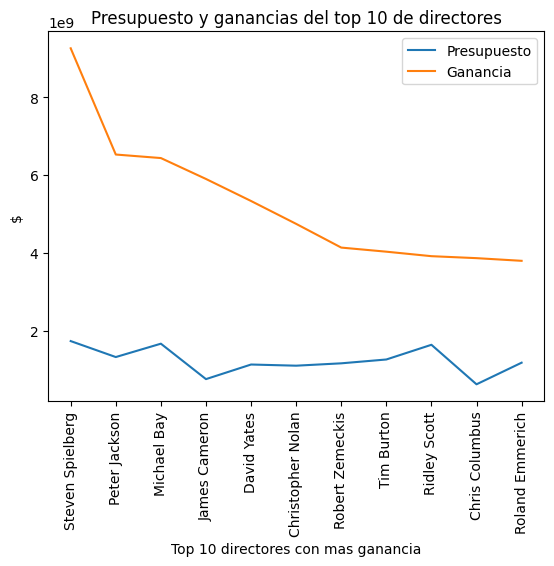

In [236]:
# Miro los directores que mas ganaron

dir = df[["director_name","revenue", "budget"]].groupby(["director_name"])["budget","revenue"].sum().reset_index().sort_values( by = "revenue", ascending = False)
dir_10 = dir.iloc[0:11]
plt.plot(dir_10["director_name"], dir_10["budget"], label='Presupuesto')
plt.plot(dir_10["director_name"], dir_10["revenue"], label='Ganancia')

plt.xlabel('Top 10 directores con mas ganancia')
plt.ylabel('$')
plt.title('Presupuesto y ganancias del top 10 de directores')
plt.legend()
plt.xticks(dir_10["director_name"], rotation='vertical')

plt.show()

Se puede ver al top 10 de directores, directores muy famosos y con grandes exitos, generando el doble o mas con el presupuesto invertido en las peliculas que realizaron.

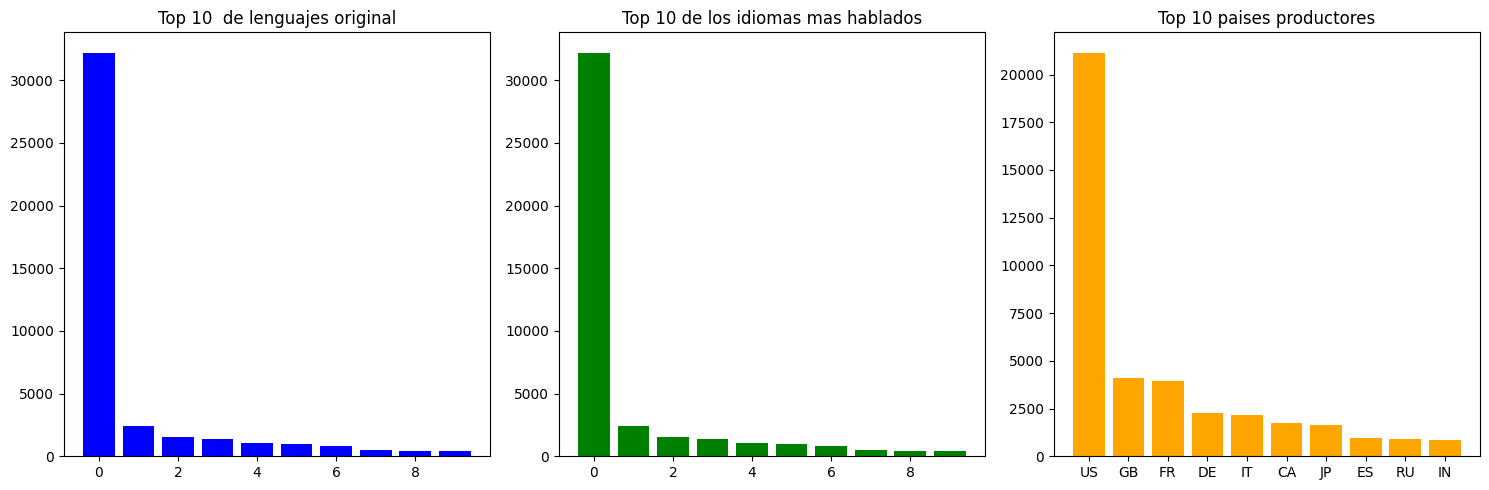

In [237]:
# Grafico para comparar y ver juntos los tops 10 de las peliculas en sus lenguajes originales, los mas hablados y los 10 mas productores

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(top_10_ol.index, top_10_ol.original_language , color='blue')
axes[0].set_title('Top 10  de lenguajes original')

axes[1].bar(df_language_top_10.index, df_language_top_10.original_language, color='green')
axes[1].set_title('Top 10 de los idiomas mas hablados')

axes[2].bar(df_countries_top_10.index, df_countries_top_10.values, color='orange')
axes[2].set_title('Top 10 paises productores')

plt.tight_layout()

plt.show()

Si bien ya se hablo de la relacion de estas tres variables sobre las peliculas: lenguajes originales, idiomas hablados y paises productores. Se nota una interesante y logica gran predominancia del Ingles, que tambien se puede ver en las primeras lenguas de los paises que mas peliculas producen.

In [238]:
country_budget = df[["budget", "production_countries_names"]].explode("production_countries_names")
country_budget = country_budget.groupby("production_countries_names").sum().sort_values(by ="budget", ascending = False)
country_budget_top_10 = country_budget.iloc[0:10]
country_budget_top_10 = pd.DataFrame(country_budget_top_10)

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\755151798.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




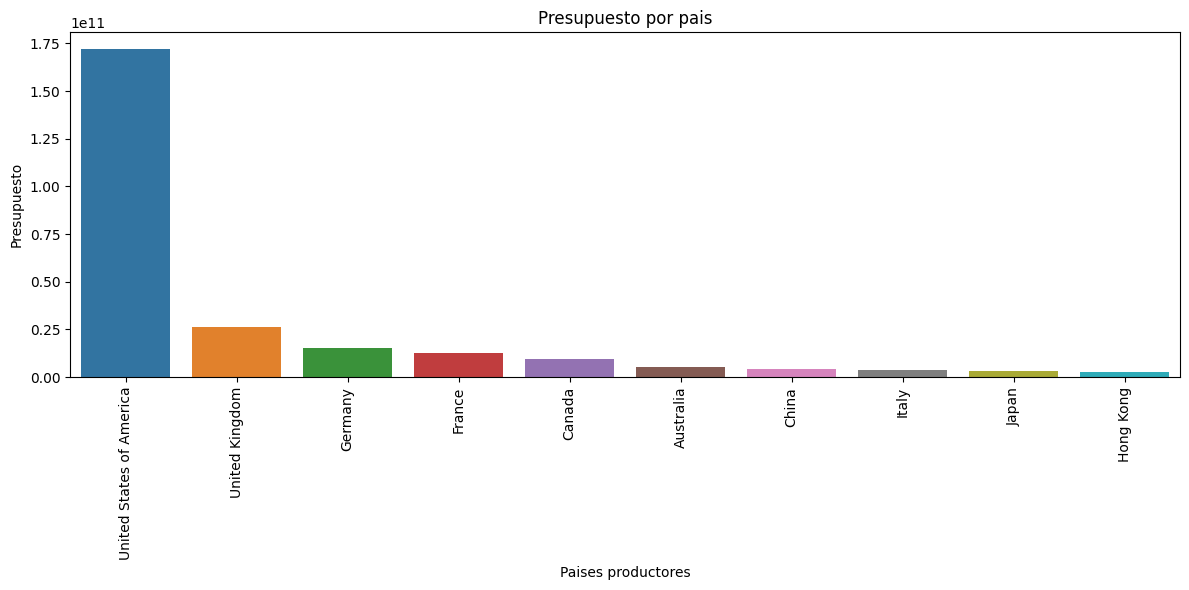

In [239]:
# Top 10 de los paises con mas presupuestoss

plt.figure(figsize=(12, 6))
sns.barplot(data=country_budget_top_10, x=country_budget_top_10.index, y=country_budget_top_10.budget, ci=None)
plt.xlabel("Paises productores")
plt.ylabel("Presupuesto")
plt.title("Presupuesto por pais")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Este grafico en relacion a la predominancias que ya veniamos viendo, mantiene tambien la logica de la plata destinada a presupuesto de estos paises. Aunque el valor de esta columna no esta completo, nos refleja el mismo indicio.

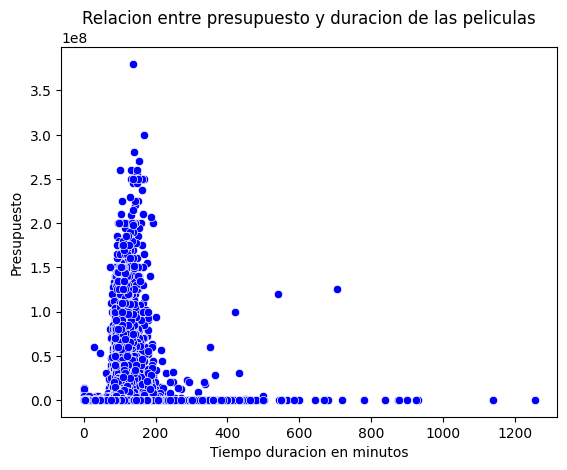

In [240]:
# Relacion entre runtime vs budget

sns.scatterplot(x=df["runtime"], y=df["budget"], marker='o', color='blue')

plt.xlabel('Tiempo duracion en minutos')
plt.ylabel('Presupuesto')
plt.title('Relacion entre presupuesto y duracion de las peliculas')

plt.show()

No hay una relacion marcada entre lo que seria presupuesto y duracion de la pelicula. Se ve en los puntos aislados lo que seria logico, en cuanto que a mayor duracion, mayor presupuesto. Pero no se ve reflejado una tendencia o correlacion entre las variables

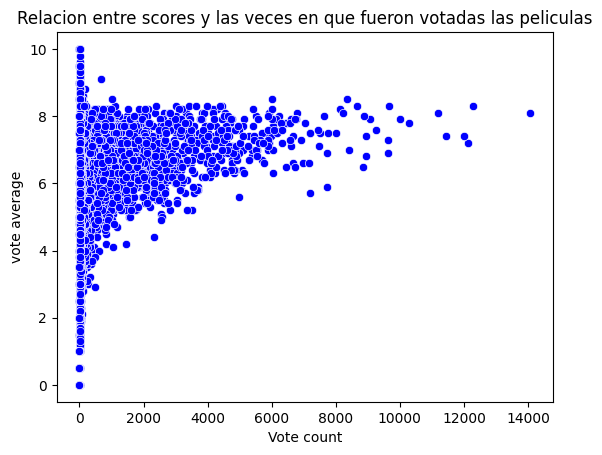

In [241]:
# Relacion entre la cantidad de votos y su puntaje promedio

sns.scatterplot(x=df["vote_count"], y=df["vote_average"], marker='o', color='blue')

plt.xlabel('Vote count')
plt.ylabel('vote average')
plt.title('Relacion entre scores y las veces en que fueron votadas las peliculas')

plt.show()

Este grafico nos muestra la relacion que hay entre la cantidad de votos y el puntaje promedio obtenido, es decir que habria que establecer un criterio en caso de basarse en estas variables para tomar analisis mas profundos, ya que no considero que sea correcto considerar peliculas por su puntaje cuando tienen una votacion menor a 500 cinefilos.

Es decir, solo consideraria como valido su votacion, cuando la pelicula tenga votos de al menos 500 personas

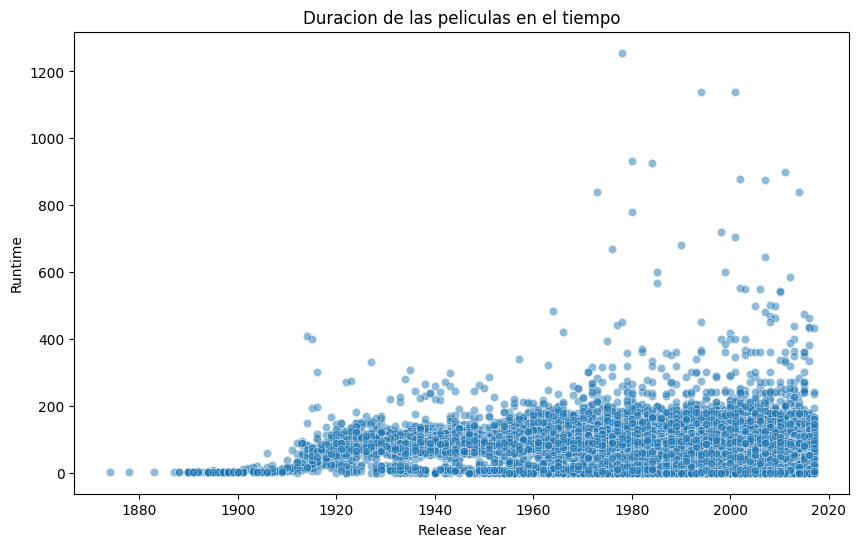

In [242]:
# Duracion de las peliculas a traves del tiempo

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='runtime', alpha=0.5)

plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Duracion de las peliculas en el tiempo')

plt.show()

Se puede ver que las peliculas en sus inicios, sus duraciones eran de muy poco tiempo, esto se debe a la complejidad y poca tecnologia para producir peliculas que habia en esas epocas, tambien debido al poco desarrollo de la industria y a la baja popularidad.



In [243]:
df_score = df[["vote_average", "popularity","vote_count"]]
df_score_calificado = df_score[df_score["vote_count"]>500]


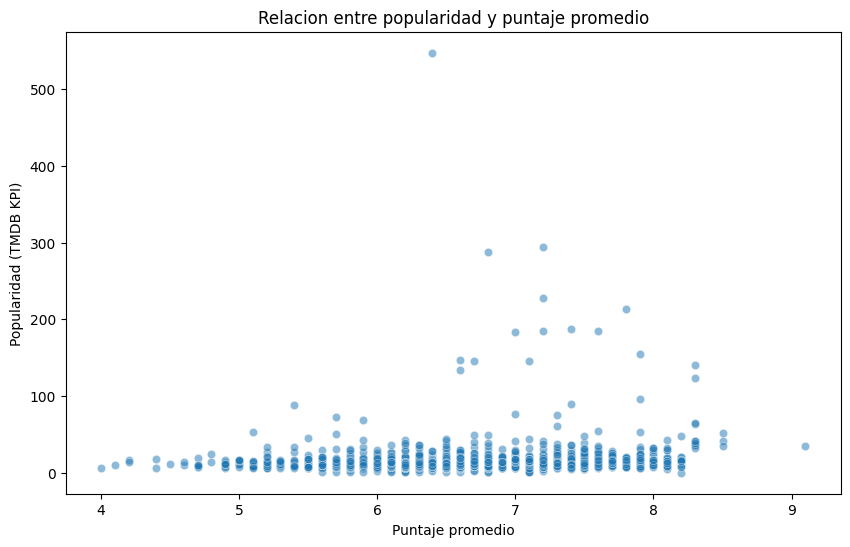

In [244]:
# popularity vs vote average

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_score_calificado, x='vote_average', y='popularity', alpha=0.5)

plt.xlabel('Puntaje promedio')
plt.ylabel('Popularidad (TMDB KPI)')
plt.title('Relacion entre popularidad y puntaje promedio')

plt.show()

Filtre el dataset, para focalizarme en los puntajes que creo y considero como "calificables", a los que poseen un votacion mayor a los 500 votos.

Se puede ver una pequeña relacion entre popularidad y el puntaje emitido por los cinefilos. Esto quiere decir, que ambos puntajes, clasifican mas o menos parejo, con lo cual son ambos buenos indicadores para tener en cuenta a la hora de ver la calidad de una pelicula.

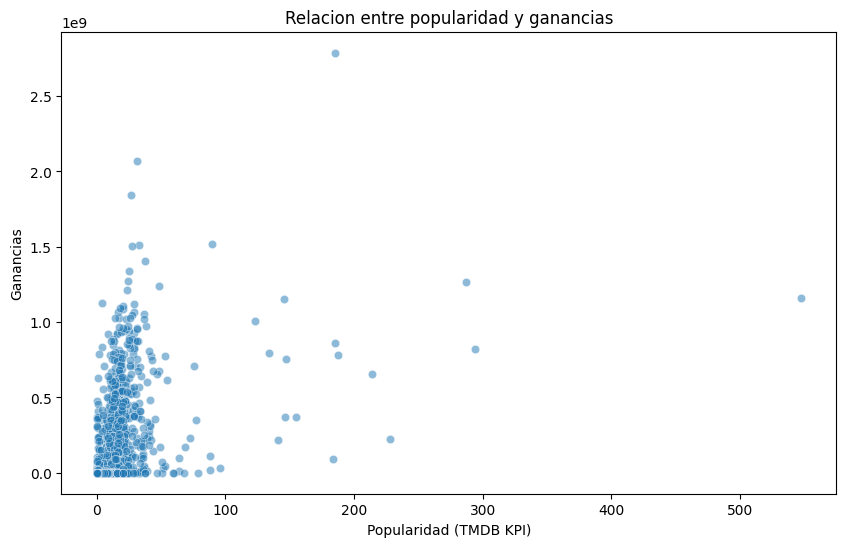

In [245]:
# popularity vs revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='revenue', alpha=0.5)

plt.xlabel('Popularidad (TMDB KPI)')
plt.ylabel('Ganancias')
plt.title('Relacion entre popularidad y ganancias')

plt.show()

Se puede ver una relacion entre popularidad y ganancias, lo cual hace sentido, ya que de manera implicita tiene en cuenta la llegada a una gran cantidad de publico. Mientras mas vistas y popular es la pelicula, mayor ganancia tendran las peliculas. 

Mientras mas vistas y considerando las clasificaciones de los usuarios, mayor la popularidad (al considerar los votos, vistas, favoritismos de los usuarios, entre otros) que tiene en cuenta el calculo de popularidad

## MODELO DE RECOMENDACION

Teniendo en cuenta las variables del dataset analizadas, me parece pertinente armar un modelo de recomendacion de KNN, vecinos mas cercanos para poder otorgar la recomendacion de peliculas.

Las variables a considerar para el modelo son las siguientes:

- Popularidad --> es un score, analizado previamente, que es utilizado en TMDB como sistema de recomendacion y me parecio un calculo que incluye variables que lo hacen un buen indicador para buscar peliculas similares.

- Generos --> Las peliculas del mismo genero suelen o deberian ser similares a grandes rasgos. Ya que en cierta forma el genero es el tema general clasificado para una pelicula. Es decir, dos peliculas de comedia tienden a ser mas similares, que una de comedia y de terror.

- Overview | Tagline --> Peliculas con similares descripciones y con tematicas iguales, mas probables y apropiadas para  recomendar a un usuario para que les guste esa pelicula.

- Idiomas hablados --> Como pudimos ver la gran mayoria de las peliculas se concentran en unos pocos idiomas. Pero es una variable importante, porque el idioma puede llegar a  ser una barrera a la hora de ver una pelicula. Es decir, por mas relacionado que x pelicula este con y, si el idioma no acompaña, la recomendacion la  considero erronea

- Directores --> Los directores me parece correcto incorporarlos al modelo, ya que un director cuenta con un estilo de peliculas, por lo cual es una variable que es util para considerar.

- Actores --> Hay actores que conmueven con sus actuaciones, y es por eso que lo considero una variable importante para incorporar al modelo. Ya que si te gusta una pelicula de x actor es probable que te gusten las otras

- Saga de peliculas --> Me parece una columna que si bien, no todas las peliculas tienen una continuacion, o son de la misma coleccion, me parece acorde y muy relevante para recomendar una pelicula similar.

- Tiempo de duracion --> Las peliculas de similar duracion, si bien no es una variable muy significante para poder  recomendar peliculas, me parece acorde recomendar tambien basandome en la duracion.



No lo puedo correr, con todas las variables por uso de memoria. Tomo generos la cual considero mas importante. 

Pero no queria dejar de mencionar lo que realmente, en caso de disponer recursos, consideraria para el modelo de recomendacion

In [246]:
# Filtro el df para el modelo

modelo = df[["title","popularity","genres_names",  "director_name", "nombre_actor", "name_belongs_to_collection", "runtime", "overview", "tagline"]]


In [247]:
modelo

title  popularity                  genres_names  \
0                        Toy Story   21.946943   [Animation, Comedy, Family]   
1                          Jumanji   17.015539  [Adventure, Fantasy, Family]   
2                 Grumpier Old Men   11.712900             [Romance, Comedy]   
3                Waiting to Exhale    3.859495      [Comedy, Drama, Romance]   
4      Father of the Bride Part II    8.387519                      [Comedy]   
...                            ...         ...                           ...   
44535                   Robin Hood    5.683753      [Drama, Action, Romance]   
44536          Century of Birthing    0.178241                       [Drama]   
44537                     Betrayal    0.903007     [Action, Drama, Thriller]   
44538             Satan Triumphant    0.003503                            []   
44539                     Queerama    0.163015                            []   

          director_name                                       nombre_actor  \
0         John Lasseter  'Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1          Joe Johnston  'Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2         Howard Deutch  'Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3       Forest Whitaker  'Whitney Houston, Angela Bassett, Loretta Devi...   
4         Charles Shyer  'Steve Martin, Diane Keaton, Martin Short, Kim...   
...                 ...                                                ...   
44535        John Irvin  'Patrick Bergin, Uma Thurman, David Morrissey,...   
44536          Lav Diaz  'Angel Aquino, Perry Dizon, Hazel Orencio, Joe...   
44537    Mark L. Lester  'Erika Eleniak, Adam Baldwin, Julie du Page, J...   
44538  Yakov Protazanov  'Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...   
44539     Daisy Asquith                                                 ''   

           name_belongs_to_collection  runtime  \
0                Toy Story Collection     81.0   
1                                 NaN    104.0   
2           Grumpy Old Men Collection    101.0   
3                                 NaN    127.0   
4      Father of the Bride Collection    106.0   
...                               ...      ...   
44535                             NaN    104.0   
44536                             NaN    360.0   
44537                             NaN     90.0   
44538                             NaN     87.0   
44539                             NaN     75.0   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44535  Yet another version of the classic epic, with ...   
44536  An artist struggles to finish his work while a...   
44537  When one of her hits goes wrong, a professiona...   
44538  In a small town live two brothers, one a minis...   
44539  50 years after decriminalisation of homosexual...   

                                                 tagline  
0                                                    NaN  
1              Roll the dice and unleash the excitement!  
2      Still Yelling. Still Fighting. Still Ready for...  
3      Friends are the people who let you be yourself...  
4      Just When His World Is Back To Normal... He's ...  
...                                                  ...  
44535                                                NaN  
44536                                                NaN  
44537                             A deadly game of wits.  
44538                                                NaN  
44539                                                NaN  

[44187 rows x 9 columns]

In [248]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44187 entries, 0 to 44539
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       44187 non-null  object 
 1   popularity                  44187 non-null  float64
 2   genres_names                44187 non-null  object 
 3   director_name               44187 non-null  object 
 4   nombre_actor                44187 non-null  object 
 5   name_belongs_to_collection  4433 non-null   object 
 6   runtime                     44187 non-null  float64
 7   overview                    43334 non-null  object 
 8   tagline                     20122 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.4+ MB


In [269]:
modelo["genres_names"] = modelo["genres_names"].astype(str).str.replace("[", "")
modelo["genres_names"] = modelo["genres_names"].astype(str).str.replace("]", "")
modelo["genres_names"] = modelo["genres_names"].astype(str).str.replace(",", "")
modelo["genres_names"] = modelo["genres_names"].astype(str).str.replace("'", "")
modelo

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\436655870.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\436655870.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\436655870.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\436655870.py:2: SettingWithCopyWarning:


A value is t

title  popularity              genres_names  \
0                        Toy Story   21.946943   Animation Comedy Family   
1                          Jumanji   17.015539  Adventure Fantasy Family   
2                 Grumpier Old Men   11.712900            Romance Comedy   
3                Waiting to Exhale    3.859495      Comedy Drama Romance   
4      Father of the Bride Part II    8.387519                    Comedy   
...                            ...         ...                       ...   
44535                   Robin Hood    5.683753      Drama Action Romance   
44536          Century of Birthing    0.178241                     Drama   
44537                     Betrayal    0.903007     Action Drama Thriller   
44538             Satan Triumphant    0.003503                             
44539                     Queerama    0.163015                             

          director_name                                       nombre_actor  \
0         John Lasseter  'Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1          Joe Johnston  'Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2         Howard Deutch  'Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3       Forest Whitaker  'Whitney Houston, Angela Bassett, Loretta Devi...   
4         Charles Shyer  'Steve Martin, Diane Keaton, Martin Short, Kim...   
...                 ...                                                ...   
44535        John Irvin  'Patrick Bergin, Uma Thurman, David Morrissey,...   
44536          Lav Diaz  'Angel Aquino, Perry Dizon, Hazel Orencio, Joe...   
44537    Mark L. Lester  'Erika Eleniak, Adam Baldwin, Julie du Page, J...   
44538  Yakov Protazanov  'Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...   
44539     Daisy Asquith                                                 ''   

           name_belongs_to_collection  runtime  \
0                Toy Story Collection     81.0   
1                                 NaN    104.0   
2           Grumpy Old Men Collection    101.0   
3                                 NaN    127.0   
4      Father of the Bride Collection    106.0   
...                               ...      ...   
44535                             NaN    104.0   
44536                             NaN    360.0   
44537                             NaN     90.0   
44538                             NaN     87.0   
44539                             NaN     75.0   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44535  Yet another version of the classic epic, with ...   
44536  An artist struggles to finish his work while a...   
44537  When one of her hits goes wrong, a professiona...   
44538  In a small town live two brothers, one a minis...   
44539  50 years after decriminalisation of homosexual...   

                                                 tagline  
0                                                    NaN  
1              Roll the dice and unleash the excitement!  
2      Still Yelling. Still Fighting. Still Ready for...  
3      Friends are the people who let you be yourself...  
4      Just When His World Is Back To Normal... He's ...  
...                                                  ...  
44535                                                NaN  
44536                                                NaN  
44537                             A deadly game of wits.  
44538                                                NaN  
44539                                                NaN  

[44187 rows x 9 columns]

In [268]:
modelo["genres_names"] = modelo["genres_names"].astype(str).str.replace(r'[\'"\s\[\]{}\\]', ' ', regex=True) 
modelo

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\1609572251.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



title  popularity              genres_names  \
0                        Toy Story   21.946943   Animation Comedy Family   
1                          Jumanji   17.015539  Adventure Fantasy Family   
2                 Grumpier Old Men   11.712900            Romance Comedy   
3                Waiting to Exhale    3.859495      Comedy Drama Romance   
4      Father of the Bride Part II    8.387519                    Comedy   
...                            ...         ...                       ...   
44535                   Robin Hood    5.683753      Drama Action Romance   
44536          Century of Birthing    0.178241                     Drama   
44537                     Betrayal    0.903007     Action Drama Thriller   
44538             Satan Triumphant    0.003503                             
44539                     Queerama    0.163015                             

          director_name                                       nombre_actor  \
0         John Lasseter  'Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1          Joe Johnston  'Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2         Howard Deutch  'Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3       Forest Whitaker  'Whitney Houston, Angela Bassett, Loretta Devi...   
4         Charles Shyer  'Steve Martin, Diane Keaton, Martin Short, Kim...   
...                 ...                                                ...   
44535        John Irvin  'Patrick Bergin, Uma Thurman, David Morrissey,...   
44536          Lav Diaz  'Angel Aquino, Perry Dizon, Hazel Orencio, Joe...   
44537    Mark L. Lester  'Erika Eleniak, Adam Baldwin, Julie du Page, J...   
44538  Yakov Protazanov  'Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...   
44539     Daisy Asquith                                                 ''   

           name_belongs_to_collection  runtime  \
0                Toy Story Collection     81.0   
1                                 NaN    104.0   
2           Grumpy Old Men Collection    101.0   
3                                 NaN    127.0   
4      Father of the Bride Collection    106.0   
...                               ...      ...   
44535                             NaN    104.0   
44536                             NaN    360.0   
44537                             NaN     90.0   
44538                             NaN     87.0   
44539                             NaN     75.0   

                                                overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
44535  Yet another version of the classic epic, with ...   
44536  An artist struggles to finish his work while a...   
44537  When one of her hits goes wrong, a professiona...   
44538  In a small town live two brothers, one a minis...   
44539  50 years after decriminalisation of homosexual...   

                                                 tagline  
0                                                    NaN  
1              Roll the dice and unleash the excitement!  
2      Still Yelling. Still Fighting. Still Ready for...  
3      Friends are the people who let you be yourself...  
4      Just When His World Is Back To Normal... He's ...  
...                                                  ...  
44535                                                NaN  
44536                                                NaN  
44537                             A deadly game of wits.  
44538                                                NaN  
44539                                                NaN  

[44187 rows x 9 columns]

In [251]:
modelo.to_csv("modelo.csv", index = False)

#### Modelo KNN

In [252]:
def recomendacion(titulo:str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''

    # Buscar la película por título en la columna 'title'
    movie = modelo[modelo['title'] == pelicula]

    if len(movie) == 0:
        return {"message":"La película no se encuentra en la base de datos."}

    # Obtener el género y la popularidad de la película
    movie_genero = movie['genres_names'].values[0]
    movie_popularity = movie['popularity'].values[0]

    # matriz de características para el modelo de vecinos más cercanos
    features = modelo[['popularity']]
    genres = modelo['genres_names'].str.get_dummies(sep=' ')
    features = pd.concat([features, genres], axis=1)

    # Manejar valores faltantes (NaN) reemplazándolos por ceros
    features = features.fillna(0)

    # modelo de vecinos más cercanos
    nn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
    nn_model.fit(features)

    # Encontrar las películas más similares (excluyendo la película de consulta indicada por usuario)
    _, indices = nn_model.kneighbors([[movie_popularity] + [0] * len(genres.columns)], n_neighbors=6)
    similar_movies_indices = indices[0][1:]  # Excluyendo la primera película que es la misma consulta
    recomendadas = modelo.iloc[similar_movies_indices]['title']

    # Si la película de consulta está en la lista de recomendaciones, la eliminamos
    if pelicula in recomendadas.tolist():
        recomendadas = recomendadas[recomendadas != pelicula]

    return {'lista recomendada': 
            recomendadas}



In [253]:
# Prueba 

recomendacion("Toy Story")

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



{'lista recomendada': 40382                              Lion
 514           Robin Hood: Men in Tights
 39298                     Amateur Night
 40780                    Hidden Figures
 1154     The Good, the Bad and the Ugly
 Name: title, dtype: object}

#### Modelo TF-IDF - COSINE SIMILARITY

In [254]:
modelo.info(

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44187 entries, 0 to 44539
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       44187 non-null  object 
 1   popularity                  44187 non-null  float64
 2   genres_names                44187 non-null  object 
 3   director_name               44187 non-null  object 
 4   nombre_actor                44187 non-null  object 
 5   name_belongs_to_collection  4433 non-null   object 
 6   runtime                     44187 non-null  float64
 7   overview                    43334 non-null  object 
 8   tagline                     20122 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.4+ MB


In [304]:
df_movies2 = modelo[[ 'overview', 'title', 'popularity']]
df_movies_sorted= df_movies2.sort_values(ascending=False, by='popularity')

In [305]:
df_movies2["overview"] = df_movies2["overview"].astype(str)

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\2766466080.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [285]:
#df_top_5= df_movies_sorted.sample(15000) 

In [306]:
## Defino un objeto vectorizador TF-IDF. Elimino las palabras vacias en infles como 'the', 'a'
tfidf= TfidfVectorizer(stop_words='english')

In [307]:
df_movies2['overview'].isna().sum()#fillna('')


0

In [308]:
df_movies2['overview'] = df_movies2['overview'].fillna('')

C:\Users\tomas\AppData\Local\Temp\ipykernel_19820\732604858.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
df_movies2.head(2)

overview      title  popularity
0  Led by Woody, Andy's toys live happily in his ...  Toy Story   21.946943
1  When siblings Judy and Peter discover an encha...    Jumanji   17.015539

In [310]:

tfidf_matrix = tfidf.fit_transform(df_movies2['overview'])

tfidf_matrix.shape

(44187, 74447)

In [311]:
#Hacemos la matriz de la similaridad del coseno
cosine_sim= linear_kernel(tfidf_matrix, tfidf_matrix)

In [312]:
## Mecanismo para identificar el indice de una pelicula en nuestro DF dado su titulo
indices=pd.Series(df_movies2.index, index=df_movies2['title']).drop_duplicates()

In [315]:
## Definimos una funcion que tome el titulo de una pelicula como entrada y genere una lista de las 5 peliculas mas parecidas
def recomendaciones (title, cosine_sim=cosine_sim):
    idx= indices[title]
    
    sim_scores= list(enumerate(cosine_sim[idx]))
    
    sim_scores= sorted(sim_scores, key=lambda x : x[1], reverse=True)
    
    sim_scores=sim_scores[1:6]
    
    movies_indices= [i[0] for i in sim_scores]
    
    return df_movies2['title'].iloc[movies_indices]


In [316]:
recomendaciones('Toy Story')

15266                    Toy Story 3
2978                     Toy Story 2
10252         The 40 Year Old Virgin
24255                      Small Fry
23584    Andy Hardy's Blonde Trouble
Name: title, dtype: object

TD-IDF con similitud del coseno, considero que es un algoritmo más acertado que KNN.